# Mutação, deriva e seleção natural
6ª implementação
**Cenário**: Uma população de bactérias que habitam um ambiente com um antibiótico. Algumas
bactérias possuem uma mutação que confere resistência ao antibiótico, enquanto outras são
sensíveis.

**Objetivos do Estudo**
* Simular a dinâmica populacional: Observar como a frequência dos alelos de resistência e
sensibilidade se altera ao longo do tempo.
* Avaliar o impacto da seleção natural: Verificar como a presença do antibiótico influencia a
sobrevivência e reprodução das bactérias resistentes e sensíveis.
* Analisar os efeitos da deriva genética: Observar como eventos aleatórios podem afetar a
frequência dos alelos, especialmente em populações pequenas.
* Investigar o papel da mutação bidirecional: Verificar como a ocorrência de novas mutações
pode reverter o processo de seleção e introduzir novas variações genéticas



In [1]:
import numpy as np
import matplotlib.pyplot as plt

from utils.evolution_functions import next_generation

In [ ]:
def next_generation(p, q, u, v, pop_size, fitness_resistant, fitness_sensitive):
    
    '''
    b_resistant -> bacterias resistentes ao antibiótico
    b_sensitive -> bacterias sensíveis ao antibiótico
    fitness -> taxa aptidão/adequação para sobreviver no ambiente com antibiótico -> fitness b_resistant > fitness b_sensitive


    '''

    p_mutated = p * (1 - u) + q * v
    q_mutated = q * (1 - v) + p * u

    # Seleção natural
    b_resistant = p_mutated * fitness_resistant
    b_sensitive = q_mutated * fitness_sensitive
    total_fitness = b_resistant + b_sensitive
    
    # Probabilidade do alelo ser resistente/sensível na próxima geração
    p_selected = b_resistant / total_fitness
    q_selected = b_sensitive / total_fitness

    # p_next = p_selected / pop_size
    # q_next = q_selected / pop_size

    # Deriva Genética
    next_gen_counts = np.random.multinomial(pop_size, [p_selected, q_selected])
    p_next = next_gen_counts[0] / pop_size
    q_next = next_gen_counts[1] / pop_size


    return p_next, q_next


def run_simulation(p0, q0, pop_size, n_generations, u, v, fitness_resistant, fitness_sensitive):
    # precision = 10
    # dict_key = f"u={u}, v={v}, Pop={p0:.4f}x{q0:.4f}"
    # estag_gens = {}

    p_values = np.zeros(n_generations)
    q_values = np.zeros(n_generations)

    avg_fitness_values = np.zeros(n_generations)
    p_values[0] = p0
    q_values[0] = q0
    avg_fitness_values[0] = p0 * fitness_resistant + q0 * fitness_sensitive

    for t in range(1, n_generations):
        p, q = next_generation(p_values[t-1], q_values[t-1], u, v, pop_size, fitness_resistant, fitness_sensitive)
        p_values[t] = p
        q_values[t] = q
        # Média ponderada dos valores de fitness das bactérias resistentes e sensíveis
        avg_fitness_values[t] = p * fitness_resistant + q * fitness_sensitive
    
    precision = 10
    if t > 10:
        if np.all(np.abs(p_values[t-10:t] - p) < precision) and np.all(np.abs(q_values[t-10:t] - q) < precision):
            print(f'Estagnação detectada na geração {t} para pop_size={pop_size}, p0={p0}')
    '''
    t = np.arange(1e5).astype(int)
    for i in t:
        if round(p, precision) == round(p_values[i-1], precision) and not estag_gens.get(dict_key, None):
            print(f"Estagnation in Gen {i}\n p: {p} q: {q}")
            estag_gens[dict_key] = i
    
    '''

    return p_values, q_values, avg_fitness_values


In [ ]:
p0_list = [0.2, 0.5, 0.8] # Frequência inicial do alelo resistente
q0_list = [1 - p0 for p0 in p0_list] # Frequência inicial do alelo sensível
pop_size_list = [5, 50, 100, 200]  
n_generations = 100
u = 1e-4
v = 1e-4
# Valores adaptativos
fitness_scenarios = [
    (1.1, 1.0),  # 1: resistente > sensível
    (1.0, 1.0),  # 2: resistente = sensível
    (0.9, 1.0)   # 3: resistente < sensível
]

Estagnação detectada na geração 99 para pop_size=5, p0=0.2
Equilíbrio de Hardy-Weinberg atingido para pop_size=5, p0=0.2
Estagnação detectada na geração 99 para pop_size=50, p0=0.2
Equilíbrio de Hardy-Weinberg atingido para pop_size=50, p0=0.2
Estagnação detectada na geração 99 para pop_size=100, p0=0.2
Equilíbrio de Hardy-Weinberg atingido para pop_size=100, p0=0.2
Estagnação detectada na geração 99 para pop_size=200, p0=0.2
Equilíbrio de Hardy-Weinberg atingido para pop_size=200, p0=0.2


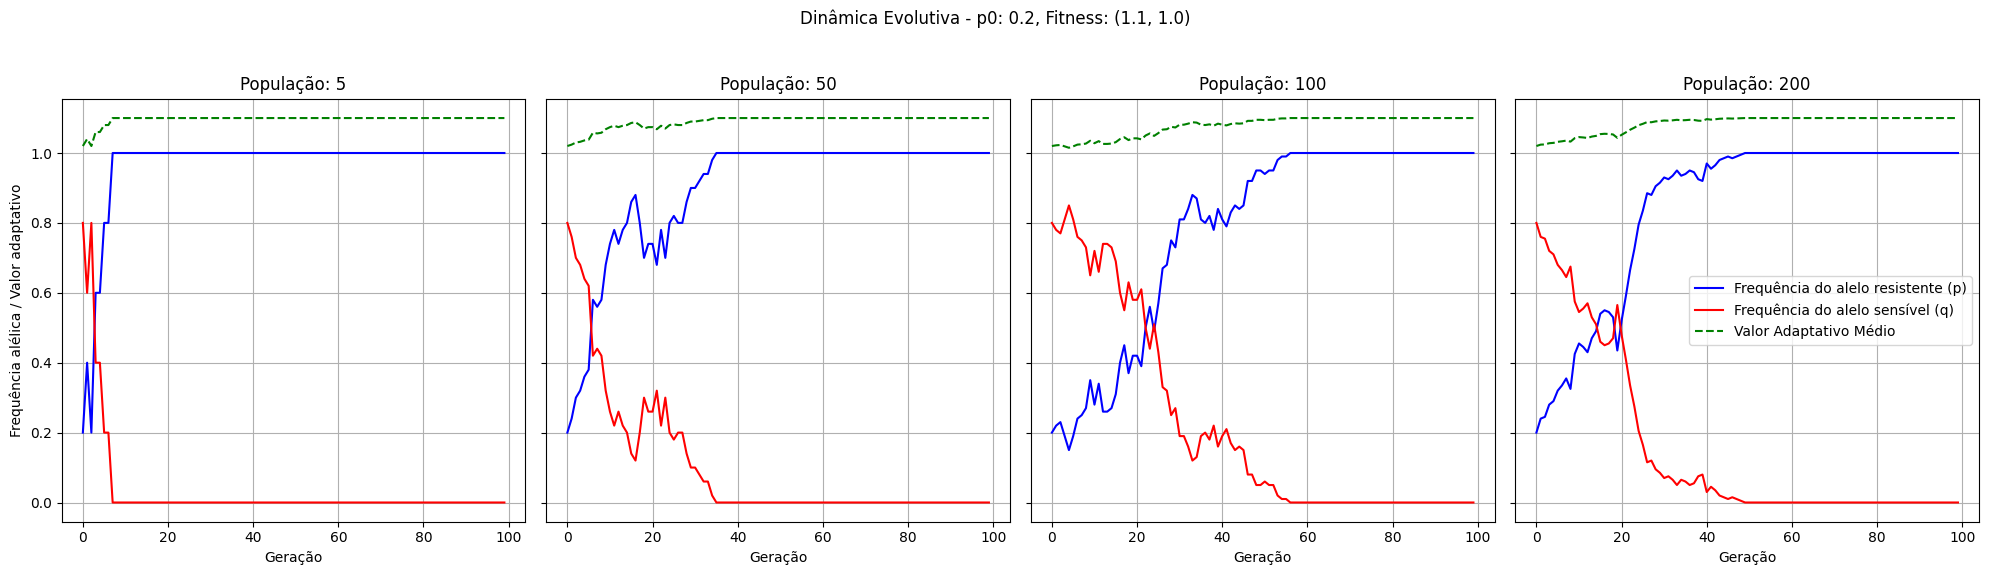

Estagnação detectada na geração 99 para pop_size=5, p0=0.2
Equilíbrio de Hardy-Weinberg atingido para pop_size=5, p0=0.2
Estagnação detectada na geração 99 para pop_size=50, p0=0.2
Equilíbrio de Hardy-Weinberg atingido para pop_size=50, p0=0.2
Estagnação detectada na geração 99 para pop_size=100, p0=0.2
Equilíbrio de Hardy-Weinberg atingido para pop_size=100, p0=0.2
Estagnação detectada na geração 99 para pop_size=200, p0=0.2
Equilíbrio de Hardy-Weinberg atingido para pop_size=200, p0=0.2


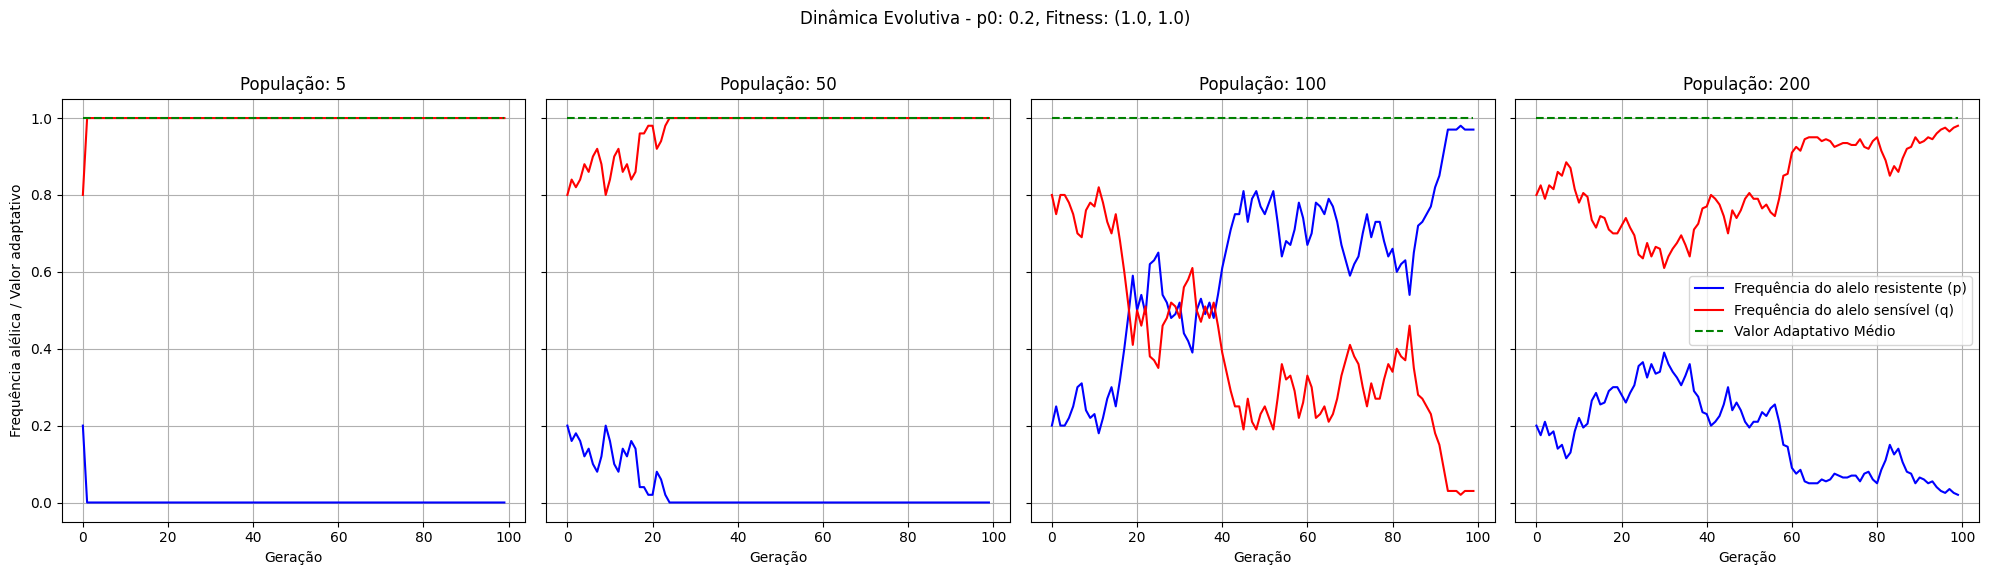

Estagnação detectada na geração 99 para pop_size=5, p0=0.2
Equilíbrio de Hardy-Weinberg atingido para pop_size=5, p0=0.2
Estagnação detectada na geração 99 para pop_size=50, p0=0.2
Equilíbrio de Hardy-Weinberg atingido para pop_size=50, p0=0.2
Estagnação detectada na geração 99 para pop_size=100, p0=0.2
Equilíbrio de Hardy-Weinberg atingido para pop_size=100, p0=0.2
Estagnação detectada na geração 99 para pop_size=200, p0=0.2
Equilíbrio de Hardy-Weinberg atingido para pop_size=200, p0=0.2


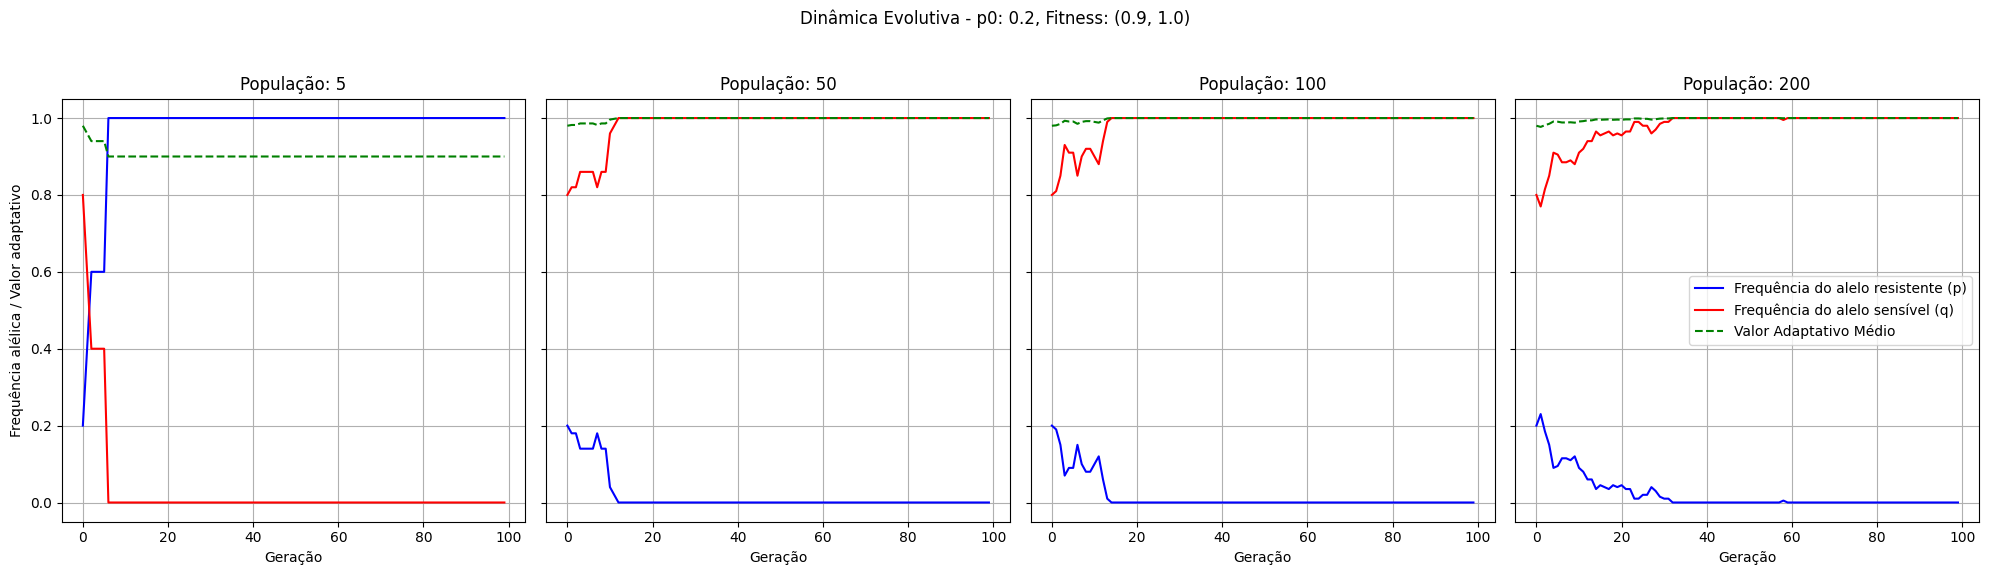

Estagnação detectada na geração 99 para pop_size=5, p0=0.5
Equilíbrio de Hardy-Weinberg atingido para pop_size=5, p0=0.5
Estagnação detectada na geração 99 para pop_size=50, p0=0.5
Equilíbrio de Hardy-Weinberg atingido para pop_size=50, p0=0.5
Estagnação detectada na geração 99 para pop_size=100, p0=0.5
Equilíbrio de Hardy-Weinberg atingido para pop_size=100, p0=0.5
Estagnação detectada na geração 99 para pop_size=200, p0=0.5
Equilíbrio de Hardy-Weinberg atingido para pop_size=200, p0=0.5


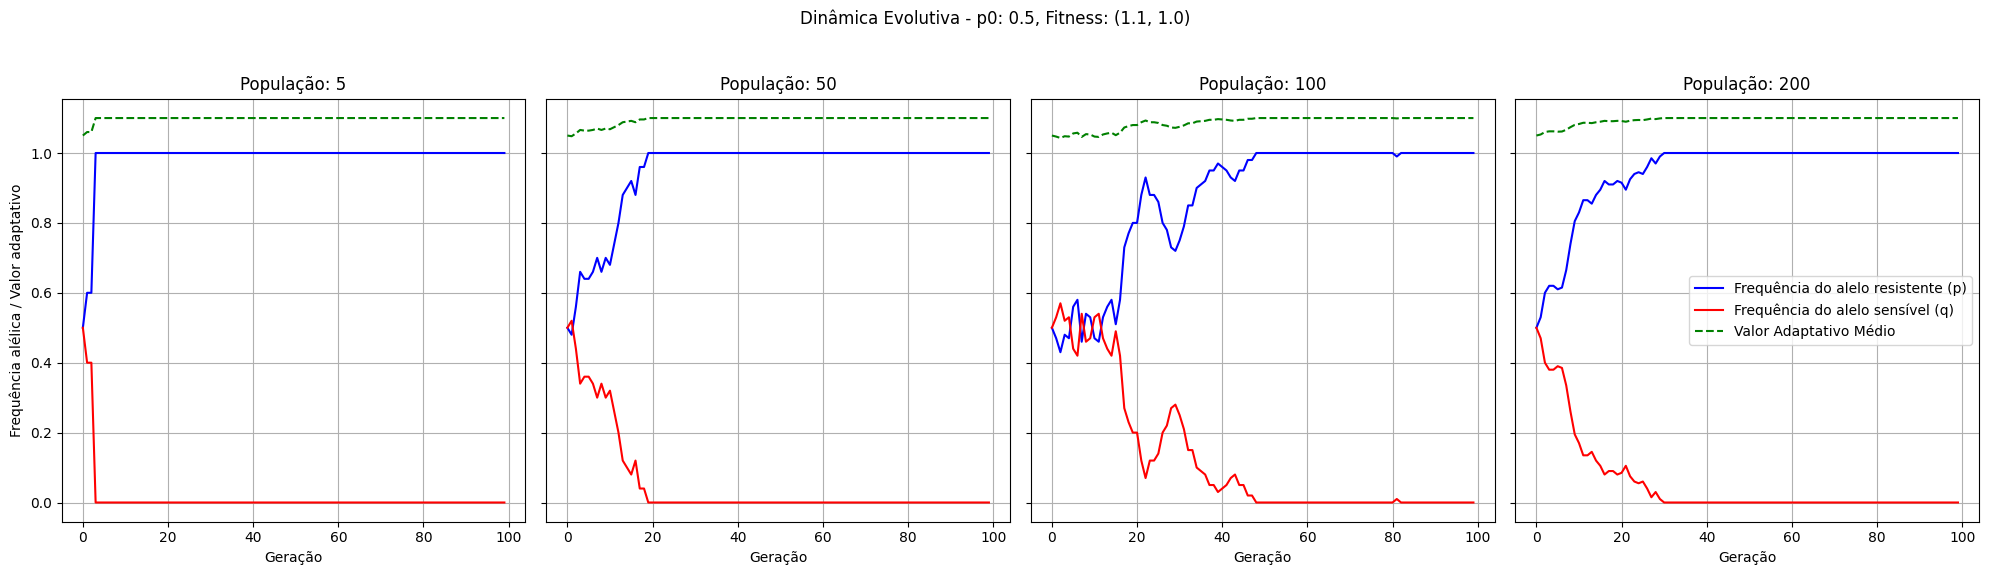

Estagnação detectada na geração 99 para pop_size=5, p0=0.5
Equilíbrio de Hardy-Weinberg atingido para pop_size=5, p0=0.5
Estagnação detectada na geração 99 para pop_size=50, p0=0.5
Equilíbrio de Hardy-Weinberg atingido para pop_size=50, p0=0.5
Estagnação detectada na geração 99 para pop_size=100, p0=0.5
Equilíbrio de Hardy-Weinberg atingido para pop_size=100, p0=0.5
Estagnação detectada na geração 99 para pop_size=200, p0=0.5
Equilíbrio de Hardy-Weinberg atingido para pop_size=200, p0=0.5


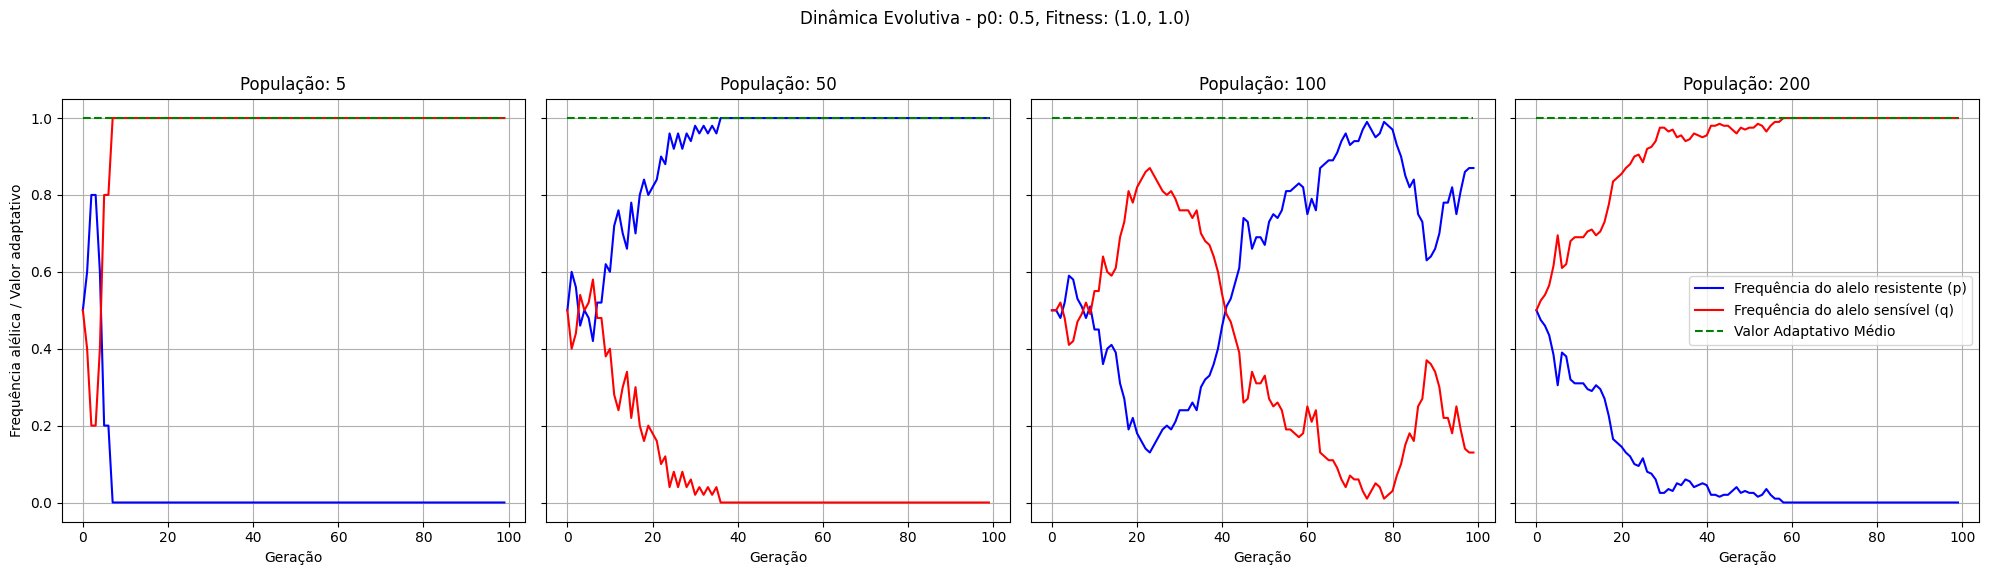

Estagnação detectada na geração 99 para pop_size=5, p0=0.5
Equilíbrio de Hardy-Weinberg atingido para pop_size=5, p0=0.5
Estagnação detectada na geração 99 para pop_size=50, p0=0.5
Equilíbrio de Hardy-Weinberg atingido para pop_size=50, p0=0.5
Estagnação detectada na geração 99 para pop_size=100, p0=0.5
Equilíbrio de Hardy-Weinberg atingido para pop_size=100, p0=0.5
Estagnação detectada na geração 99 para pop_size=200, p0=0.5
Equilíbrio de Hardy-Weinberg atingido para pop_size=200, p0=0.5


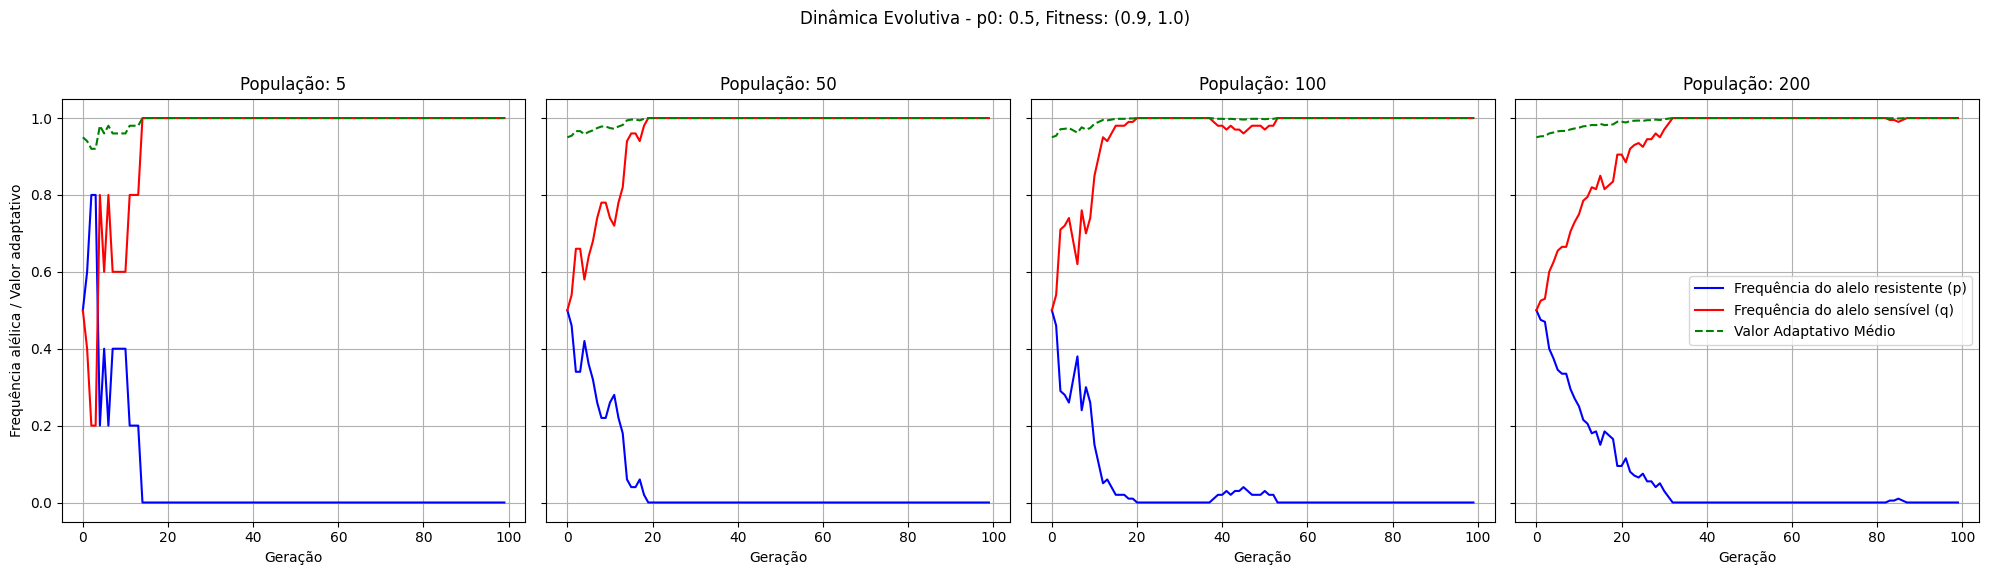

Estagnação detectada na geração 99 para pop_size=5, p0=0.8
Equilíbrio de Hardy-Weinberg atingido para pop_size=5, p0=0.8
Estagnação detectada na geração 99 para pop_size=50, p0=0.8
Equilíbrio de Hardy-Weinberg atingido para pop_size=50, p0=0.8
Estagnação detectada na geração 99 para pop_size=100, p0=0.8
Equilíbrio de Hardy-Weinberg atingido para pop_size=100, p0=0.8
Estagnação detectada na geração 99 para pop_size=200, p0=0.8
Equilíbrio de Hardy-Weinberg atingido para pop_size=200, p0=0.8


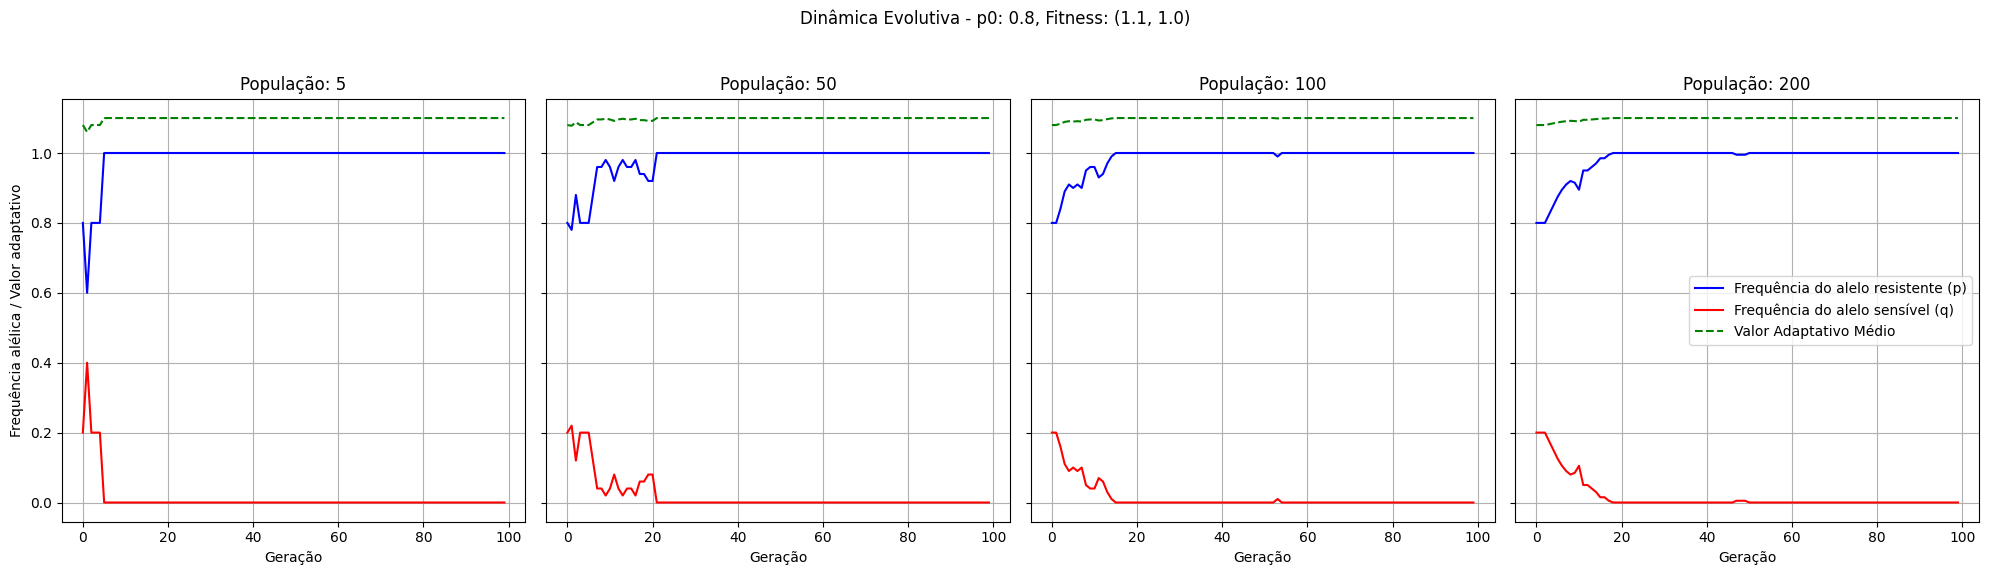

Estagnação detectada na geração 99 para pop_size=5, p0=0.8
Equilíbrio de Hardy-Weinberg atingido para pop_size=5, p0=0.8
Estagnação detectada na geração 99 para pop_size=50, p0=0.8
Equilíbrio de Hardy-Weinberg atingido para pop_size=50, p0=0.8
Estagnação detectada na geração 99 para pop_size=100, p0=0.8
Equilíbrio de Hardy-Weinberg atingido para pop_size=100, p0=0.8
Estagnação detectada na geração 99 para pop_size=200, p0=0.8
Equilíbrio de Hardy-Weinberg atingido para pop_size=200, p0=0.8


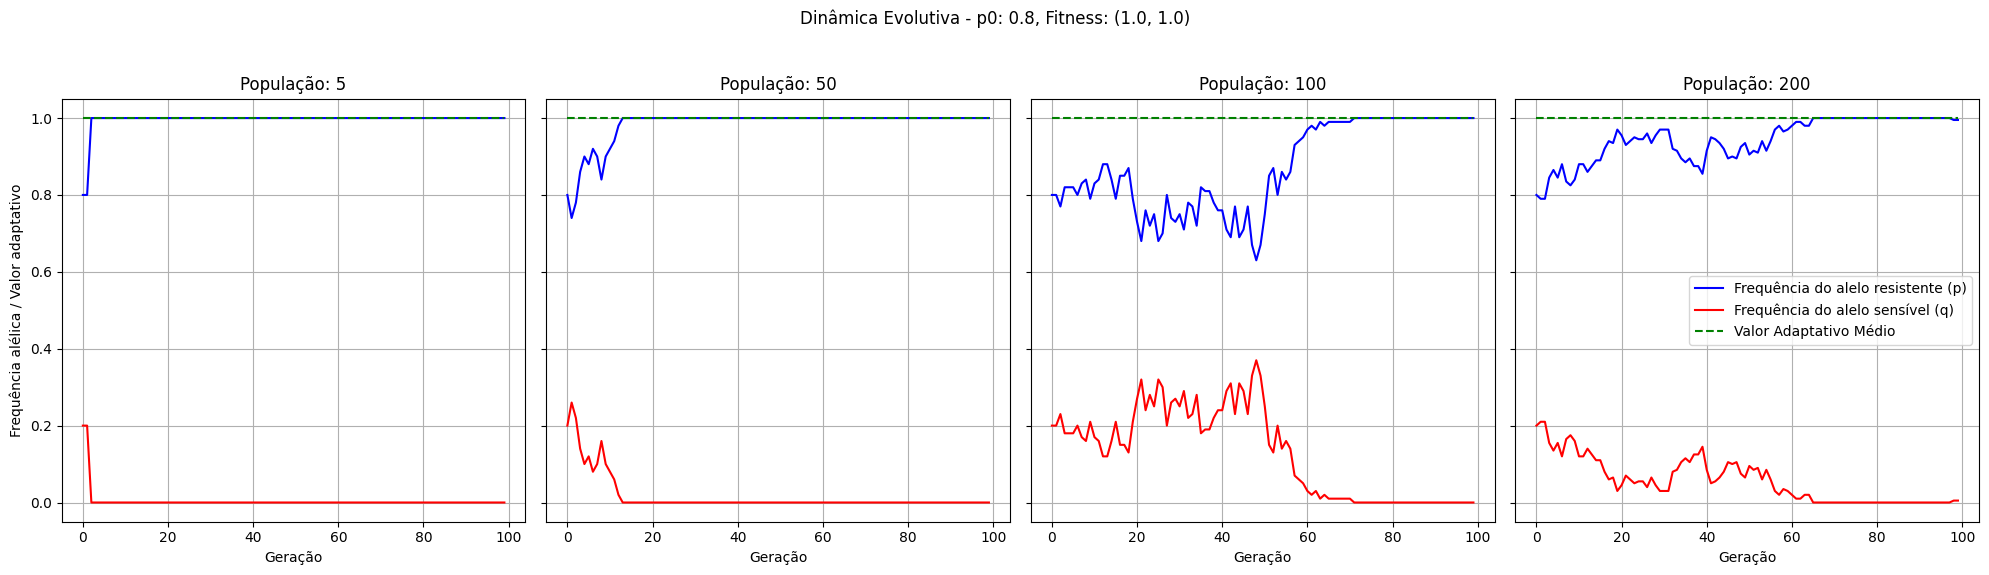

Estagnação detectada na geração 99 para pop_size=5, p0=0.8
Equilíbrio de Hardy-Weinberg atingido para pop_size=5, p0=0.8
Estagnação detectada na geração 99 para pop_size=50, p0=0.8
Equilíbrio de Hardy-Weinberg atingido para pop_size=50, p0=0.8
Estagnação detectada na geração 99 para pop_size=100, p0=0.8
Equilíbrio de Hardy-Weinberg atingido para pop_size=100, p0=0.8
Estagnação detectada na geração 99 para pop_size=200, p0=0.8
Equilíbrio de Hardy-Weinberg atingido para pop_size=200, p0=0.8


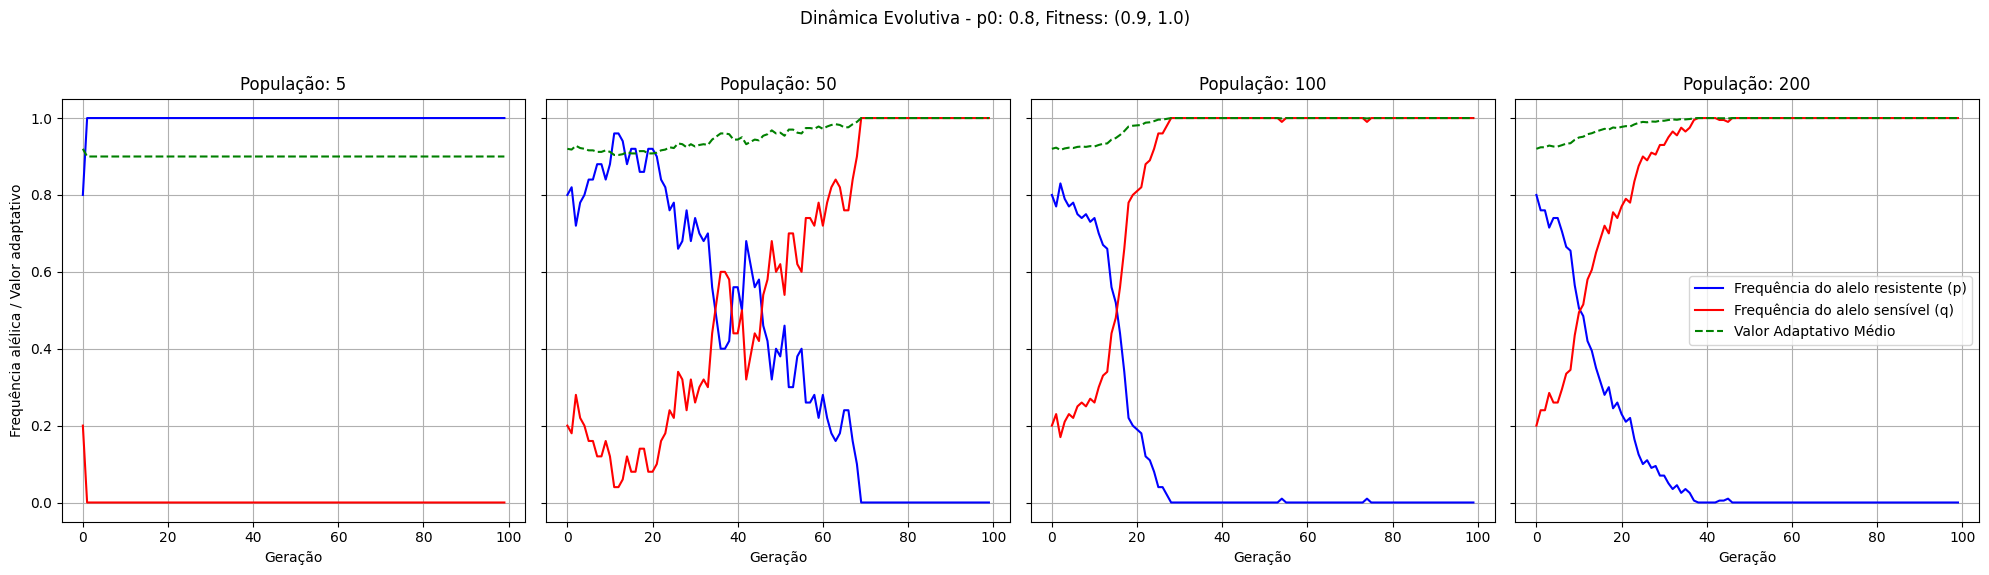

In [27]:
for p0, q0 in zip(p0_list, q0_list):
    for fitness_resistant, fitness_sensitive in fitness_scenarios:
        fig, axes = plt.subplots(1, len(pop_size_list), figsize=(20, 6), sharey=True)
        fig.suptitle(f'Dinâmica Evolutiva - p0: {p0}, Fitness: ({fitness_resistant}, {fitness_sensitive})')
        
        for idx, pop_size in enumerate(pop_size_list):
            p_values, q_values, avg_fitness_values = run_simulation(p0, q0, pop_size, n_generations, u, v, fitness_resistant, fitness_sensitive)
            
            # Verificando Equilíbrio de Hardy-Weinberg
            p_2 = p_values[-1]**2
            q_2 = q_values[-1]**2
            pq_2 = 2 * p_values[-1] * q_values[-1]
            if np.isclose(p_2 + pq_2 + q_2, 1.0, atol=1e-3):
                print(f'Equilíbrio de Hardy-Weinberg atingido para pop_size={pop_size}, p0={p0}')
            
            # Plots
            ax = axes[idx]
            ax.plot(range(len(p_values)), p_values, label='Frequência do alelo resistente (p)', color='b')
            ax.plot(range(len(q_values)), q_values, label='Frequência do alelo sensível (q)', color='r')
            ax.plot(range(len(avg_fitness_values)), avg_fitness_values, label='Valor Adaptativo Médio', color='g', linestyle='--')
            ax.set_xlabel('Geração')
            ax.set_title(f'População: {pop_size}')
            ax.grid()
        
        axes[0].set_ylabel('Frequência alélica / Valor adaptativo')
        axes[-1].legend()
        plt.tight_layout(rect=[0, 0.03, 1, 0.95])
        plt.show()


– Avaliar dentre as diferentes condições:

* Há momentos em que alguma força praticamente deixa de atuar?
    R. Nos testes com o fitness resistentes = sensíveis não haveria vantagem seletiva para nenhuma das bactérias, casos em que a taxa de mutação é muito pequena, praticamente zero, ou ainda, quando as populações são grandes, a deriva gênica passa a ter menor influência.

* Há momentos em que a população entra em estagnação?
    R. Em nenhum dos testes houve estagnação, provavelmente devido a presença das forças evolutivas no processo.

* Há casos em que a população tem seu valor adaptativo médio reduzido ao longo das gerações? Discuta.

    R. O valor adaptativo médio nunca teria seu valor reduzido. No entanto, nos casos em que a adaptabilidade das bactérias sensíveis tem uma taxa maior, o valor adaptativo médio apresenta uma queda, pois mesmo com um alelo presente na população em maior frequência, se ele tiver um valor de fitness menor, a média ponderada poderá ser reduzida, e a população estaria se tornando menos adaptada ao ambiente. Nesse caso (resistentes < sensíveis), o valor adaptativo médio cai quando a frequência de bactérias resistente aumenta, devido as outras forças evolutivas envolvidas, em especial para populações pequenas, a deriva gênica poderia levar a uma população menos adaptada e com valores adaptativos médios menores.
    

No geral, com uma população pequena, há maiores taxas de variação no começo, enquanto as populações grandes apresentam maiores variações nas frequências de p e q.
    Em muitos casos, a frequência dos alelos sensíveis aumenta, mesmo em casos em que a adaptação (fitness) favorece os resistentes, possivelmente devido a influêncio da deriva e da mutação, já que, se estivesse sob a ação da seleção natural apenas, o esperado seria o valor de sensíveis cair e de resistentes aumentar.

    

## Testes *somente* com Seleção Natural

In [19]:
p0_list = [0.2, 0.5, 0.8] # Frequência inicial do alelo resistente
q0_list = [1 - p0 for p0 in p0_list] # Frequência inicial do alelo sensível
pop_size_list = [5, 50, 100, 200]  
n_generations = 100
u = 0
v = 0
# Valores adaptativos
fitness_scenarios = [
    (1.1, 1.0),  # 1: resistente > sensível
    (1.0, 1.0),  # 2: resistente = sensível
    (0.9, 1.0)   # 3: resistente < sensível
]

Estagnação detectada na geração 99 para pop_size=5, p0=0.2
Estagnação detectada na geração 99 para pop_size=50, p0=0.2
Estagnação detectada na geração 99 para pop_size=100, p0=0.2
Estagnação detectada na geração 99 para pop_size=200, p0=0.2


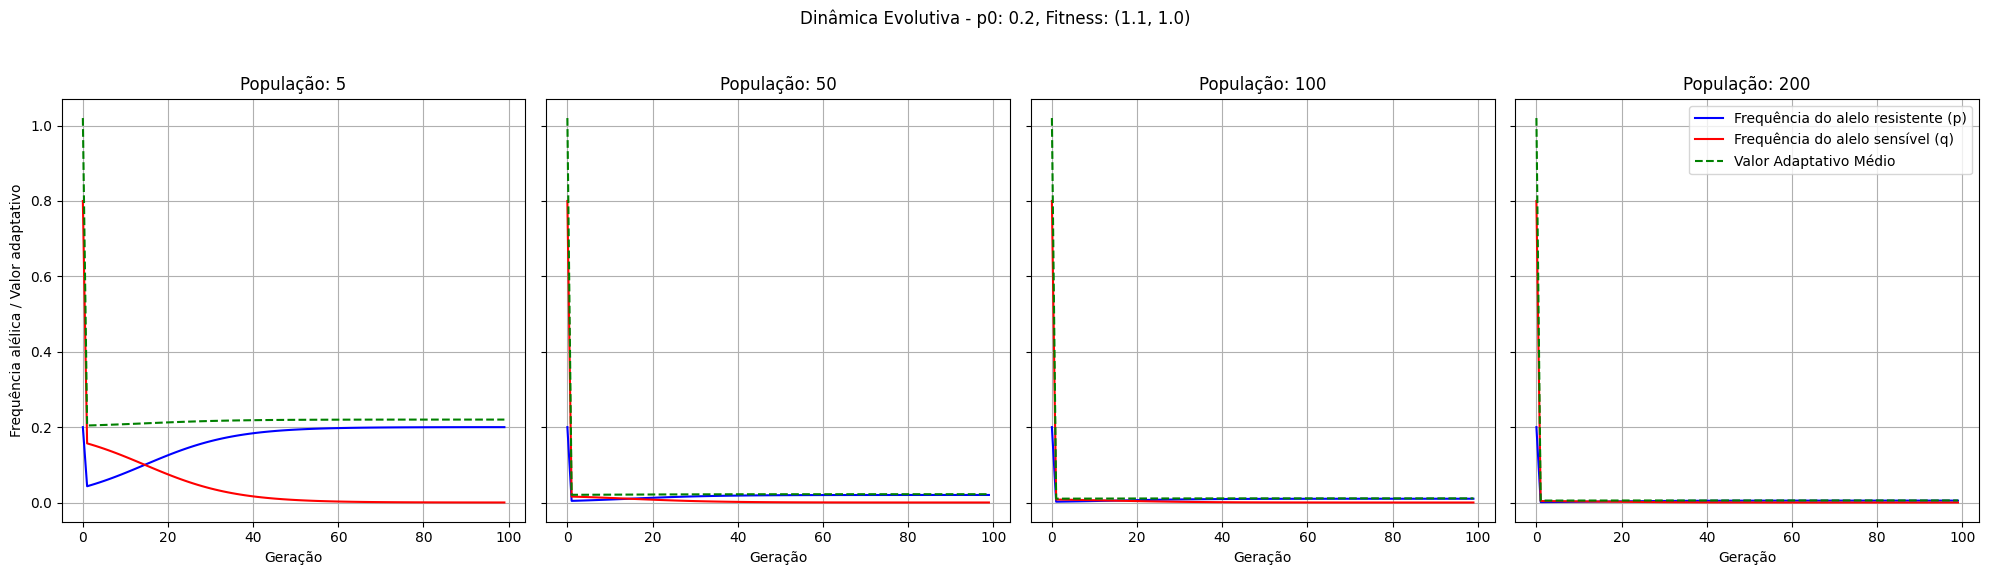

Estagnação detectada na geração 99 para pop_size=5, p0=0.2
Estagnação detectada na geração 99 para pop_size=50, p0=0.2
Estagnação detectada na geração 99 para pop_size=100, p0=0.2
Estagnação detectada na geração 99 para pop_size=200, p0=0.2


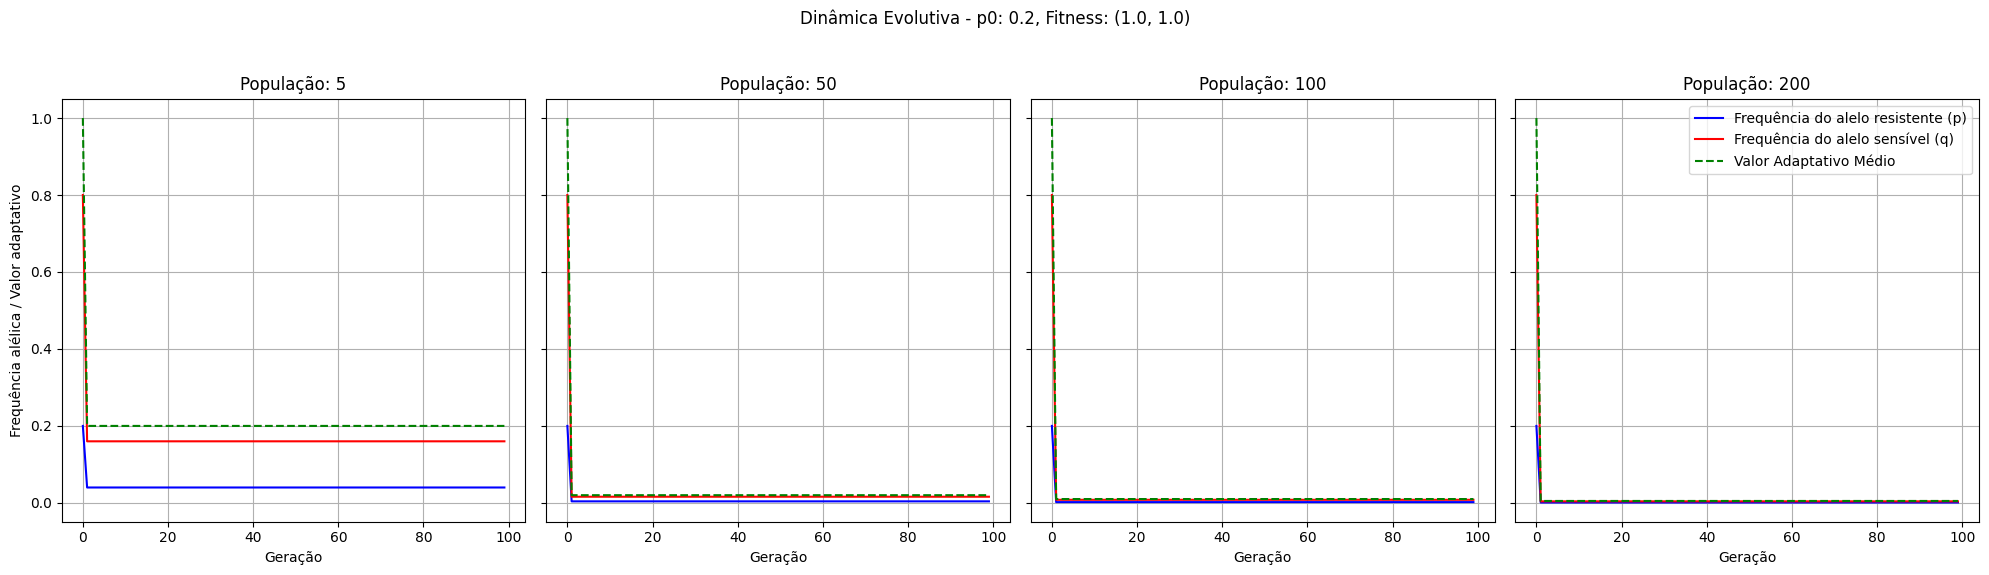

Estagnação detectada na geração 99 para pop_size=5, p0=0.2
Estagnação detectada na geração 99 para pop_size=50, p0=0.2
Estagnação detectada na geração 99 para pop_size=100, p0=0.2
Estagnação detectada na geração 99 para pop_size=200, p0=0.2


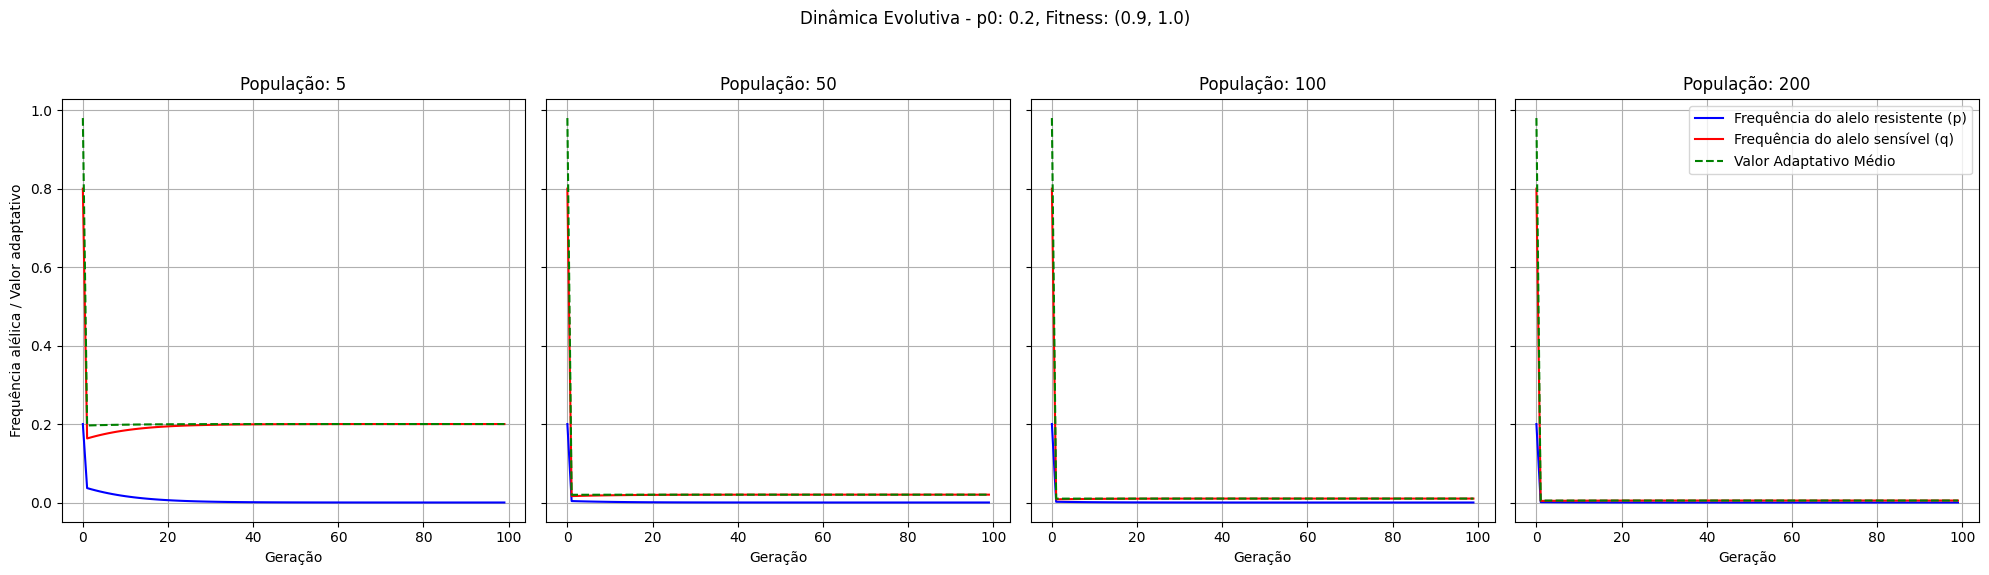

Estagnação detectada na geração 99 para pop_size=5, p0=0.5
Estagnação detectada na geração 99 para pop_size=50, p0=0.5
Estagnação detectada na geração 99 para pop_size=100, p0=0.5
Estagnação detectada na geração 99 para pop_size=200, p0=0.5


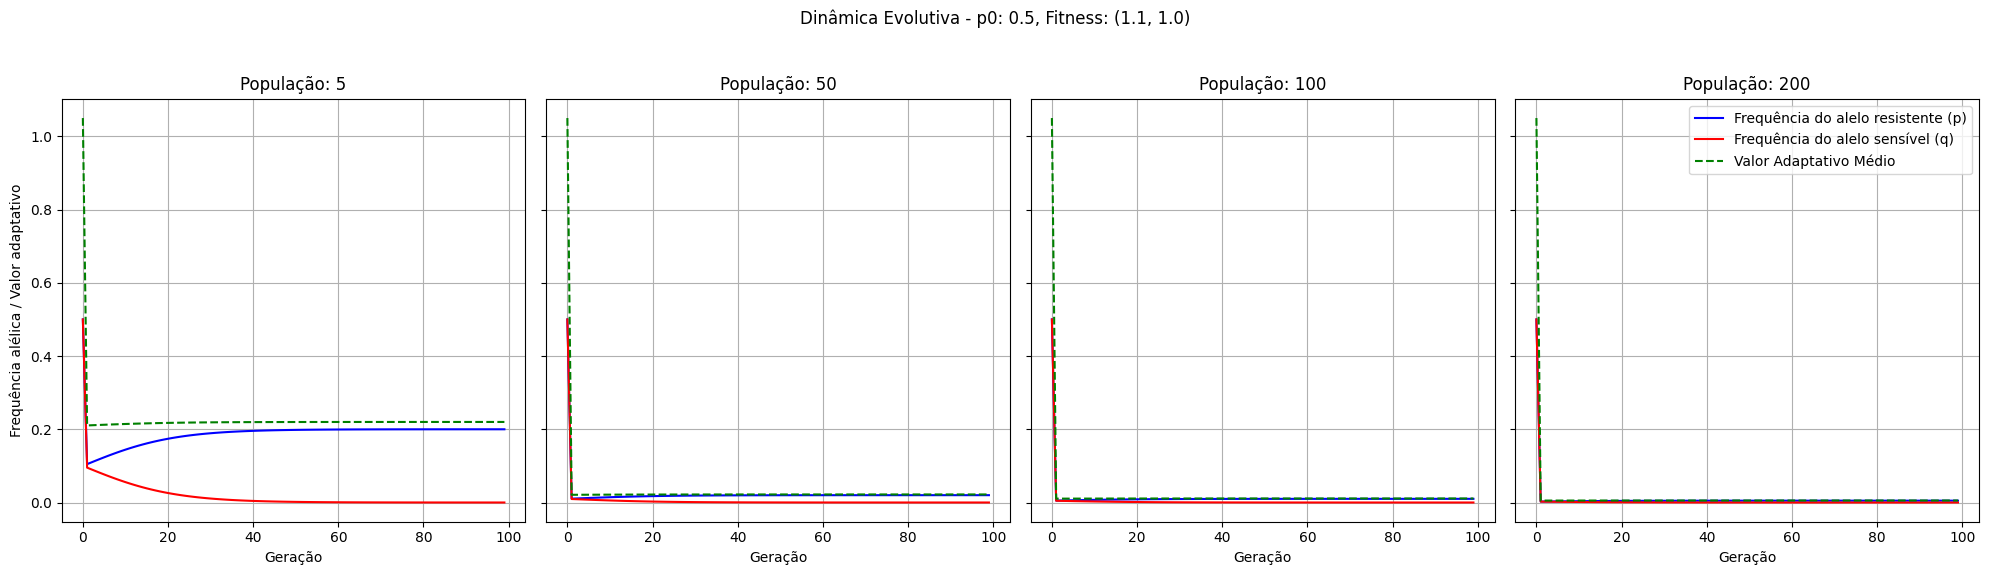

Estagnação detectada na geração 99 para pop_size=5, p0=0.5
Estagnação detectada na geração 99 para pop_size=50, p0=0.5
Estagnação detectada na geração 99 para pop_size=100, p0=0.5
Estagnação detectada na geração 99 para pop_size=200, p0=0.5


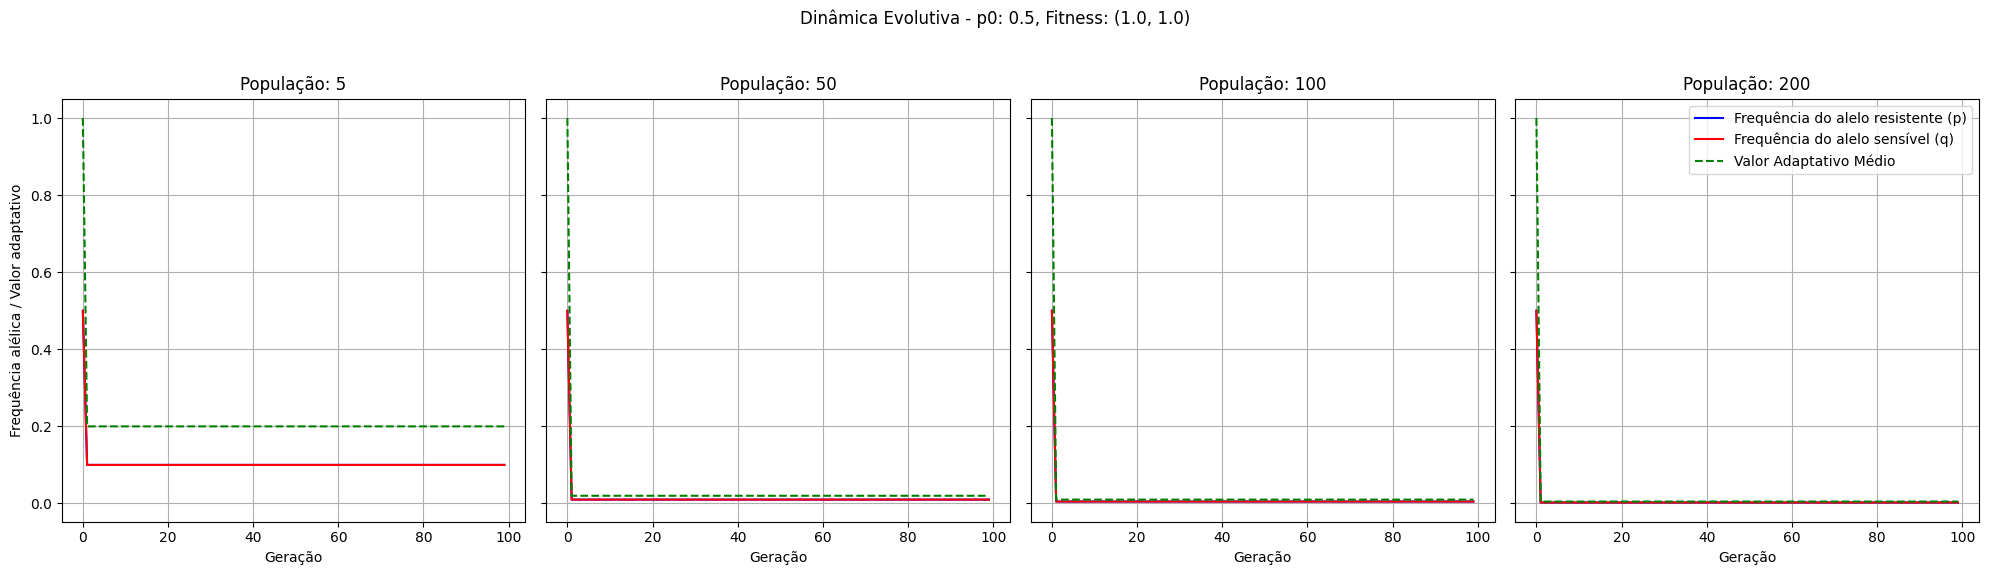

Estagnação detectada na geração 99 para pop_size=5, p0=0.5
Estagnação detectada na geração 99 para pop_size=50, p0=0.5
Estagnação detectada na geração 99 para pop_size=100, p0=0.5
Estagnação detectada na geração 99 para pop_size=200, p0=0.5


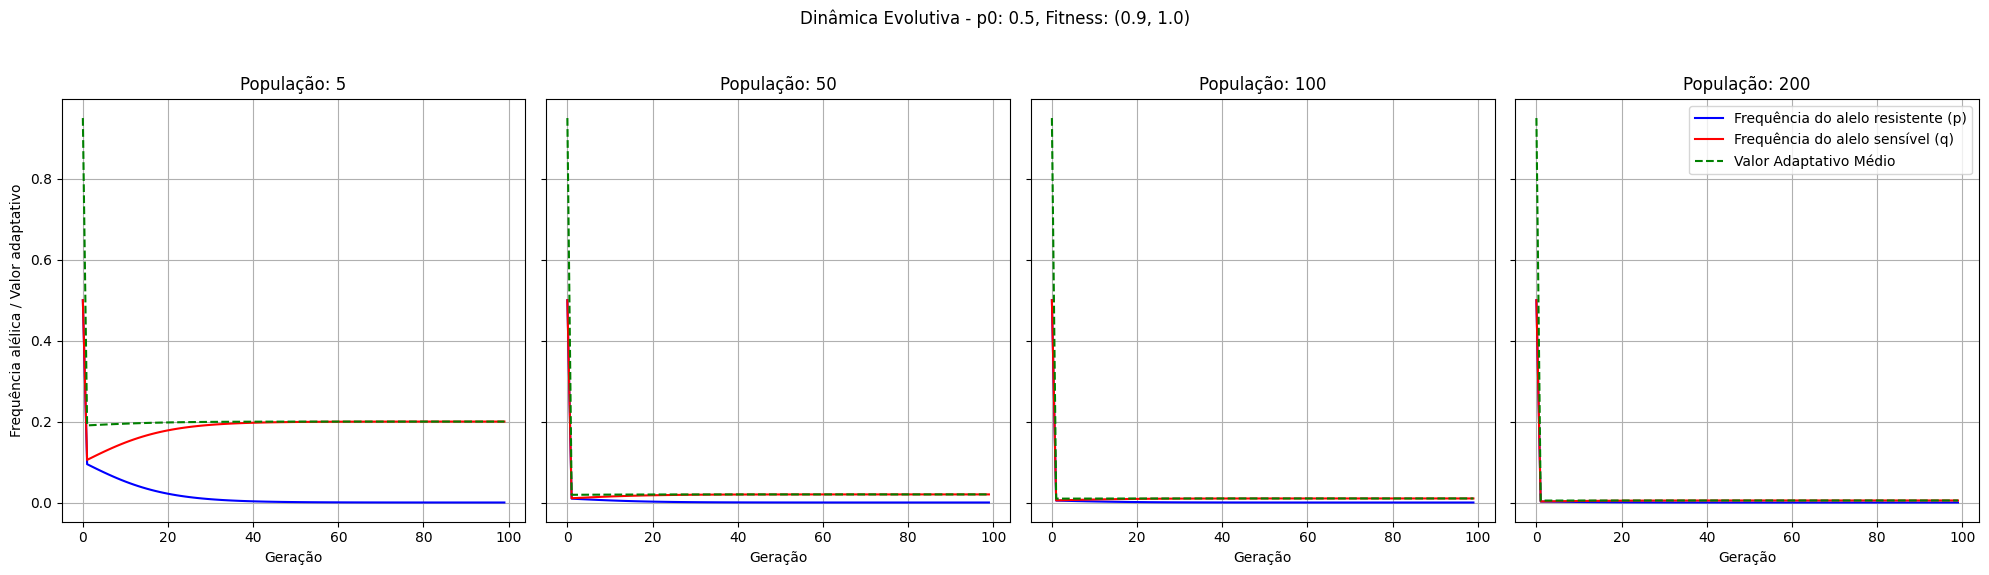

Estagnação detectada na geração 99 para pop_size=5, p0=0.8
Estagnação detectada na geração 99 para pop_size=50, p0=0.8
Estagnação detectada na geração 99 para pop_size=100, p0=0.8
Estagnação detectada na geração 99 para pop_size=200, p0=0.8


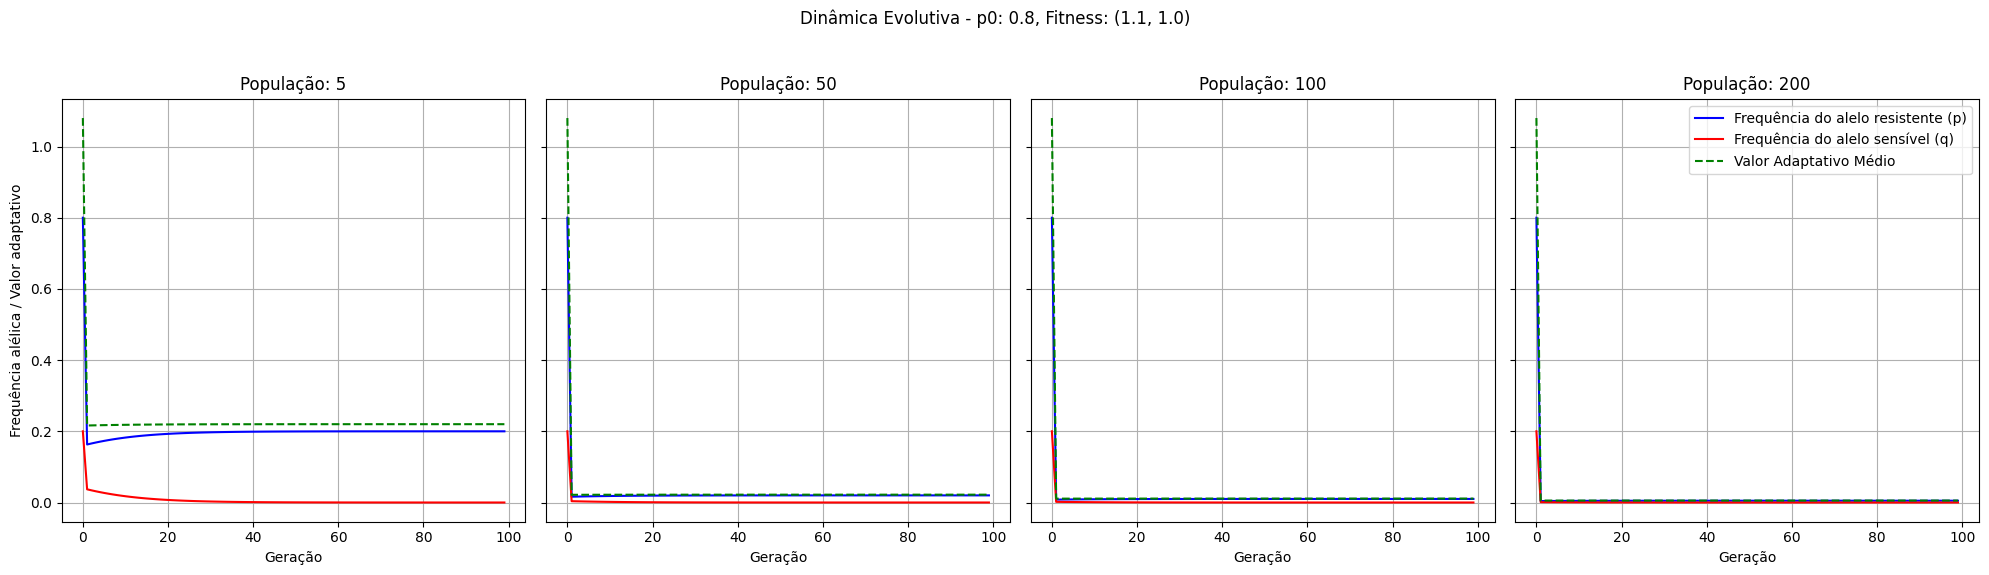

Estagnação detectada na geração 99 para pop_size=5, p0=0.8
Estagnação detectada na geração 99 para pop_size=50, p0=0.8
Estagnação detectada na geração 99 para pop_size=100, p0=0.8
Estagnação detectada na geração 99 para pop_size=200, p0=0.8


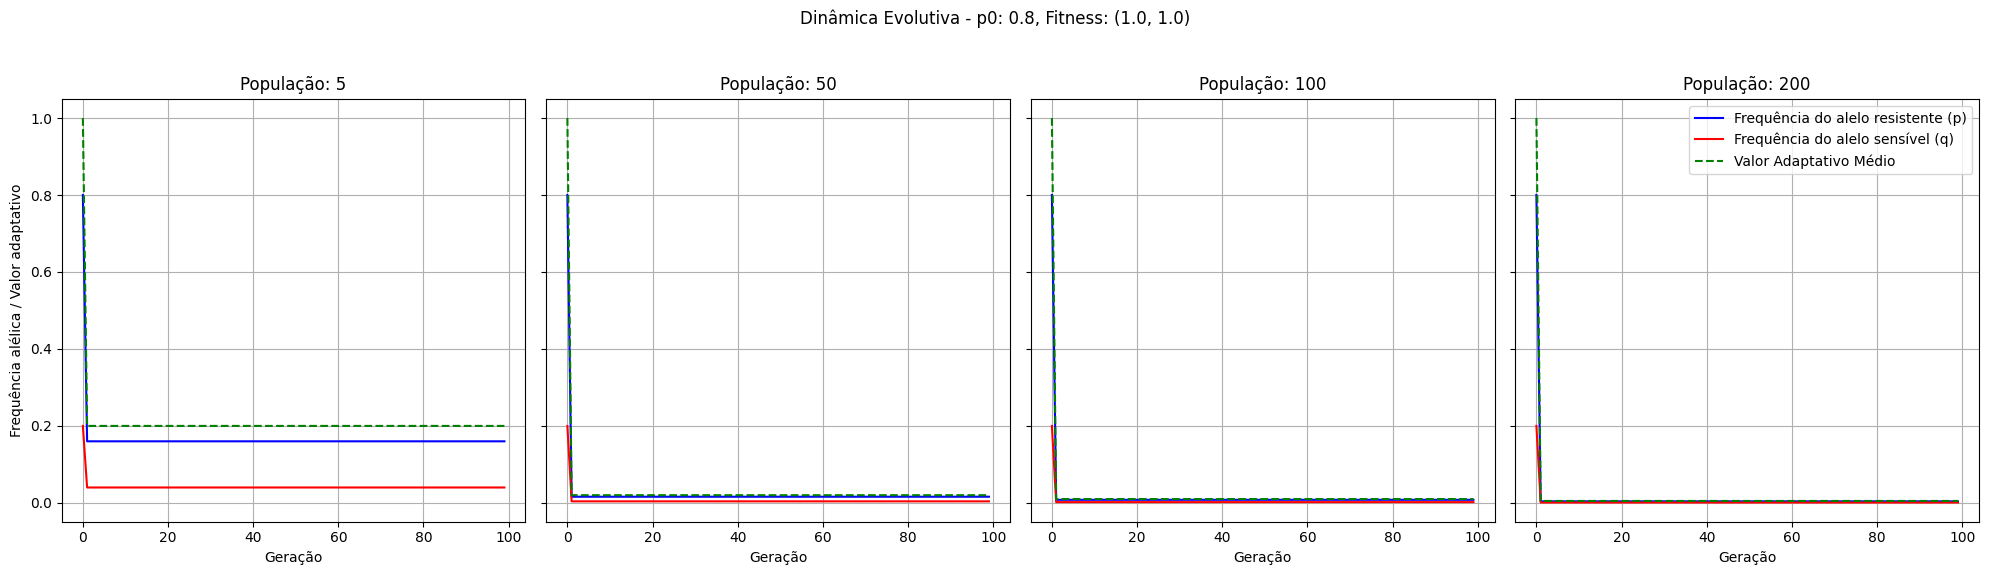

Estagnação detectada na geração 99 para pop_size=5, p0=0.8
Estagnação detectada na geração 99 para pop_size=50, p0=0.8
Estagnação detectada na geração 99 para pop_size=100, p0=0.8
Estagnação detectada na geração 99 para pop_size=200, p0=0.8


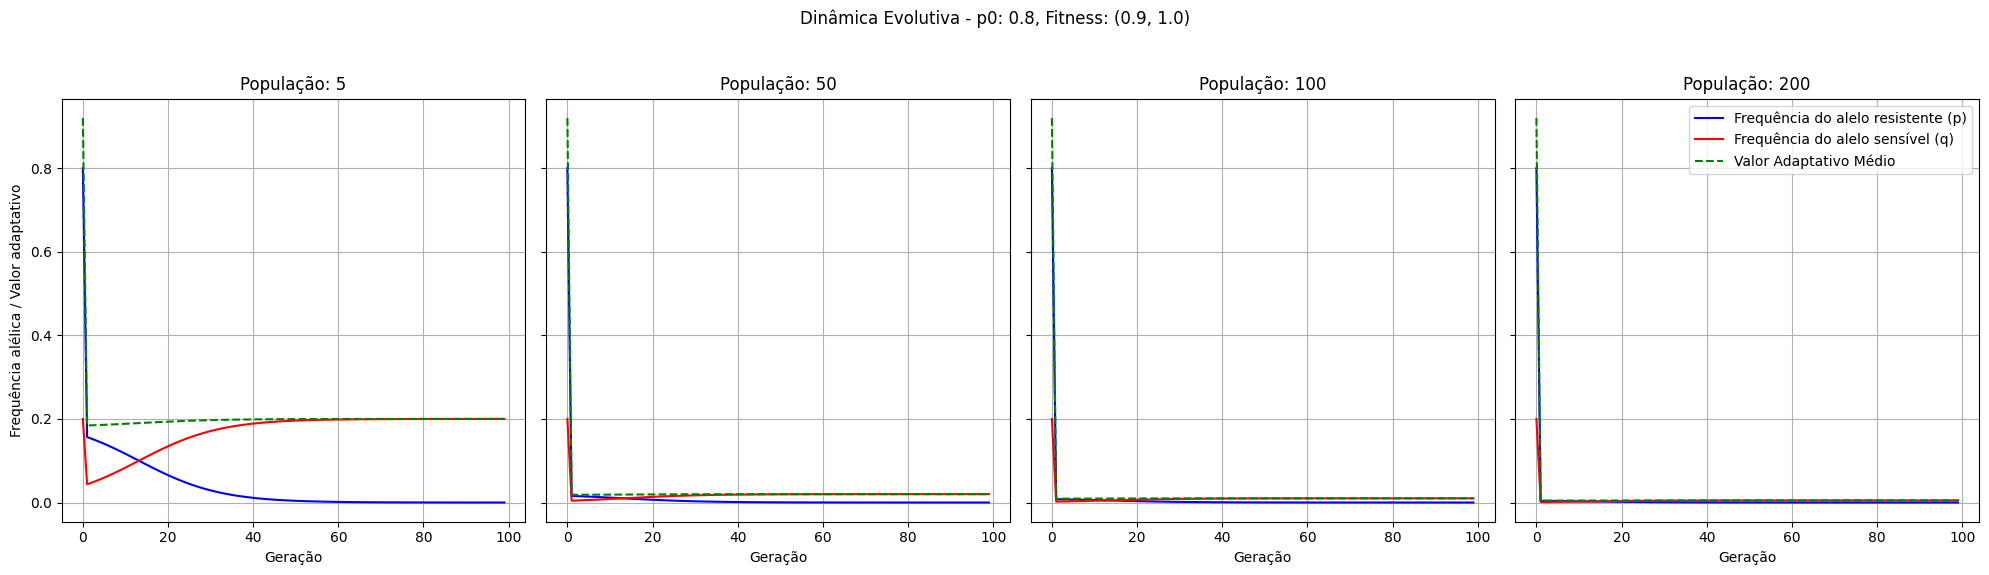

In [20]:
for p0, q0 in zip(p0_list, q0_list):
    for fitness_resistant, fitness_sensitive in fitness_scenarios:
        fig, axes = plt.subplots(1, len(pop_size_list), figsize=(20, 6), sharey=True)
        fig.suptitle(f'Dinâmica Evolutiva - p0: {p0}, Fitness: ({fitness_resistant}, {fitness_sensitive})')
        
        for idx, pop_size in enumerate(pop_size_list):
            p_values, q_values, avg_fitness_values = run_simulation(p0, q0, pop_size, n_generations, u, v, fitness_resistant, fitness_sensitive)
            
            # Verificando Equilíbrio de Hardy-Weinberg
            p_2 = p_values[-1]**2
            q_2 = q_values[-1]**2
            pq_2 = 2 * p_values[-1] * q_values[-1]
            if np.isclose(p_2 + pq_2 + q_2, 1.0, atol=1e-3):
                print(f'Equilíbrio de Hardy-Weinberg atingido para pop_size={pop_size}, p0={p0}')
            
            # Plots
            ax = axes[idx]
            ax.plot(range(len(p_values)), p_values, label='Frequência do alelo resistente (p)', color='b')
            ax.plot(range(len(q_values)), q_values, label='Frequência do alelo sensível (q)', color='r')
            ax.plot(range(len(avg_fitness_values)), avg_fitness_values, label='Valor Adaptativo Médio', color='g', linestyle='--')
            ax.set_xlabel('Geração')
            ax.set_title(f'População: {pop_size}')
            ax.grid()
        
        axes[0].set_ylabel('Frequência alélica / Valor adaptativo')
        axes[-1].legend()
        plt.tight_layout(rect=[0, 0.03, 1, 0.95])
        plt.show()


## Teste *com* Seleção Natural e Mutação

In [22]:
p0_list = [0.2, 0.5, 0.8] # Frequência inicial do alelo resistente
q0_list = [1 - p0 for p0 in p0_list] # Frequência inicial do alelo sensível
pop_size_list = [5, 50, 100, 200]  
n_generations = 100
u = 1e-4
v = 1e-4
# Valores adaptativos
fitness_scenarios = [
    (1.1, 1.0),  # 1: resistente > sensível
    (1.0, 1.0),  # 2: resistente = sensível
    (0.9, 1.0)   # 3: resistente < sensível
]

Estagnação detectada na geração 99 para pop_size=5, p0=0.2
Estagnação detectada na geração 99 para pop_size=50, p0=0.2
Estagnação detectada na geração 99 para pop_size=100, p0=0.2
Estagnação detectada na geração 99 para pop_size=200, p0=0.2


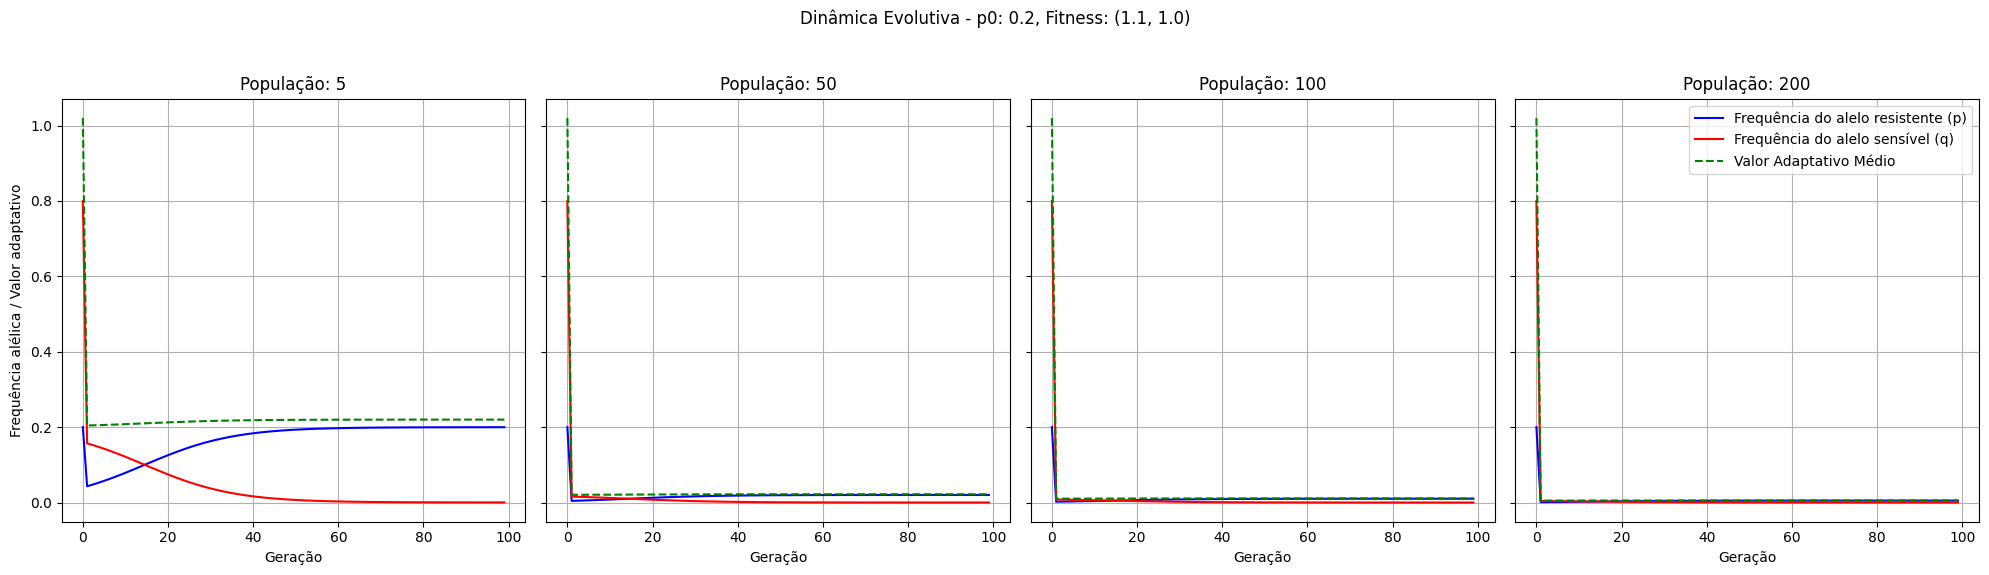

Estagnação detectada na geração 99 para pop_size=5, p0=0.2
Estagnação detectada na geração 99 para pop_size=50, p0=0.2
Estagnação detectada na geração 99 para pop_size=100, p0=0.2
Estagnação detectada na geração 99 para pop_size=200, p0=0.2


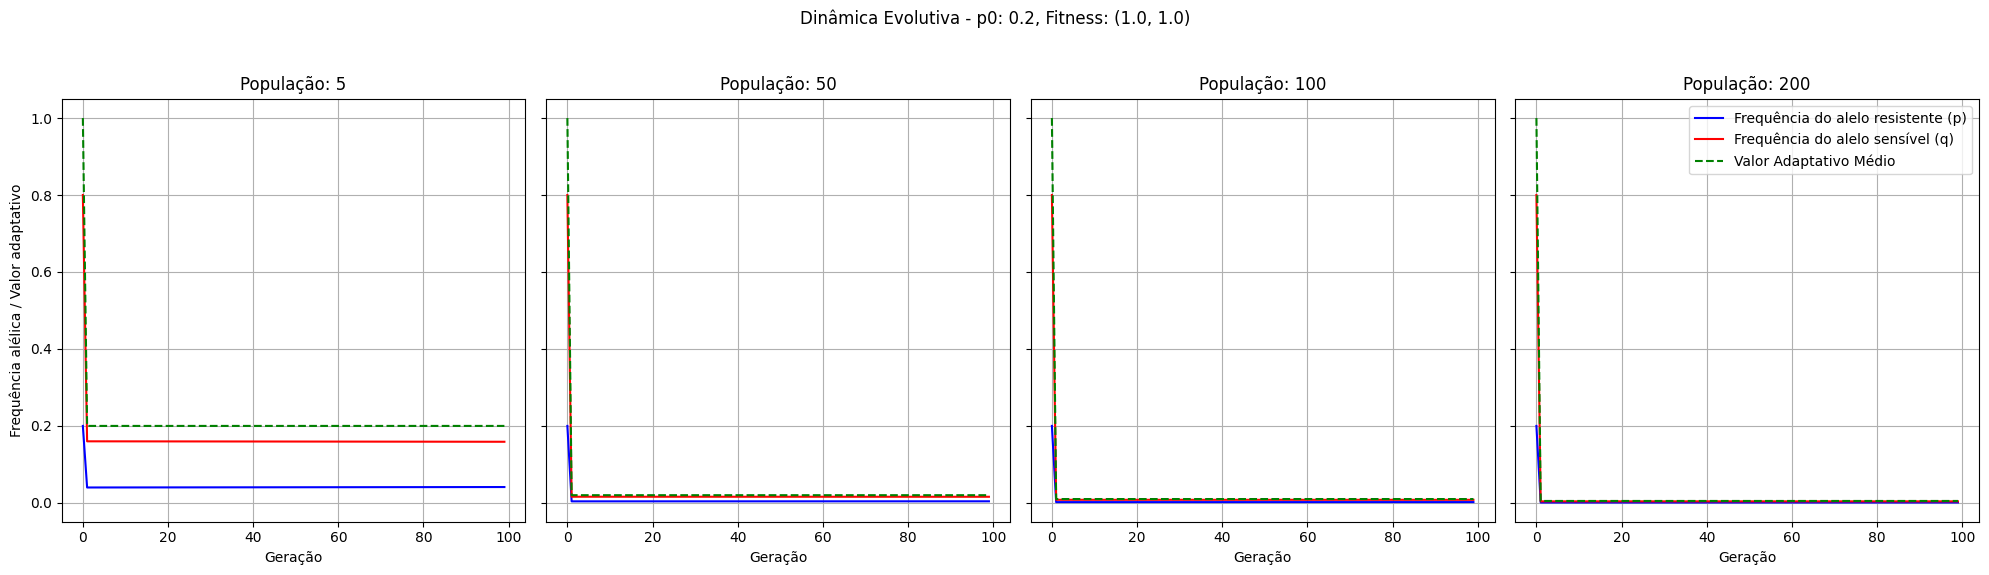

Estagnação detectada na geração 99 para pop_size=5, p0=0.2
Estagnação detectada na geração 99 para pop_size=50, p0=0.2
Estagnação detectada na geração 99 para pop_size=100, p0=0.2
Estagnação detectada na geração 99 para pop_size=200, p0=0.2


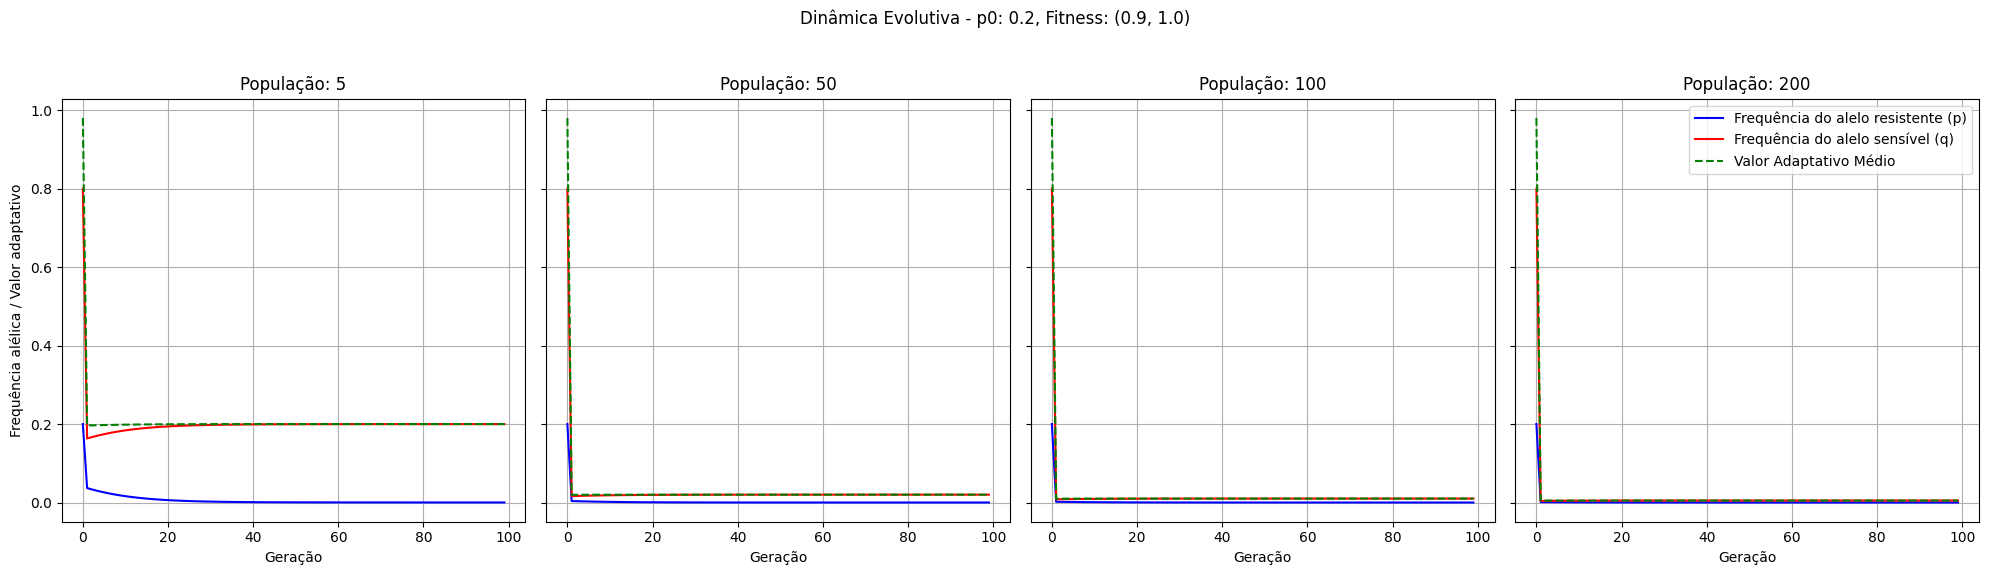

Estagnação detectada na geração 99 para pop_size=5, p0=0.5
Estagnação detectada na geração 99 para pop_size=50, p0=0.5
Estagnação detectada na geração 99 para pop_size=100, p0=0.5
Estagnação detectada na geração 99 para pop_size=200, p0=0.5


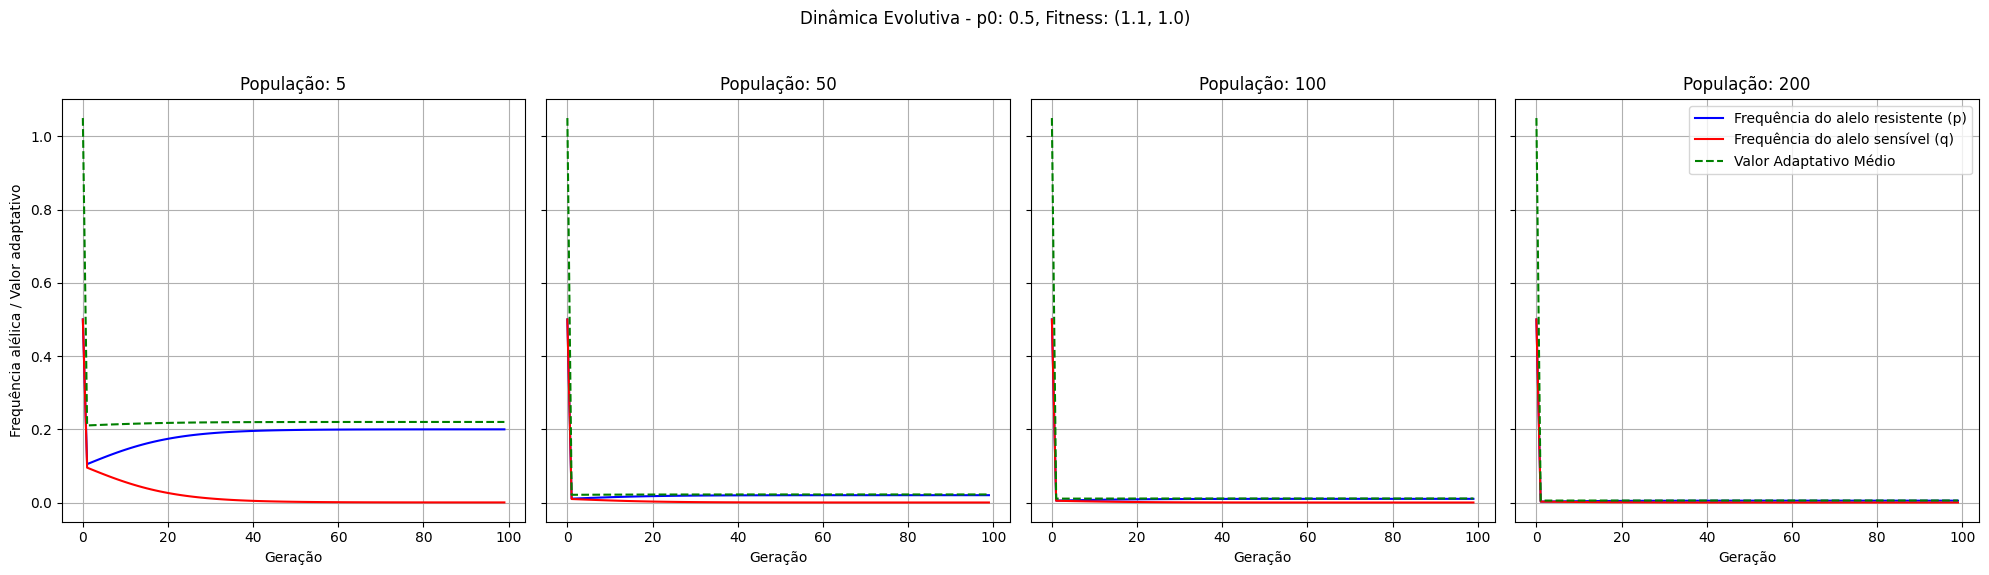

Estagnação detectada na geração 99 para pop_size=5, p0=0.5
Estagnação detectada na geração 99 para pop_size=50, p0=0.5
Estagnação detectada na geração 99 para pop_size=100, p0=0.5
Estagnação detectada na geração 99 para pop_size=200, p0=0.5


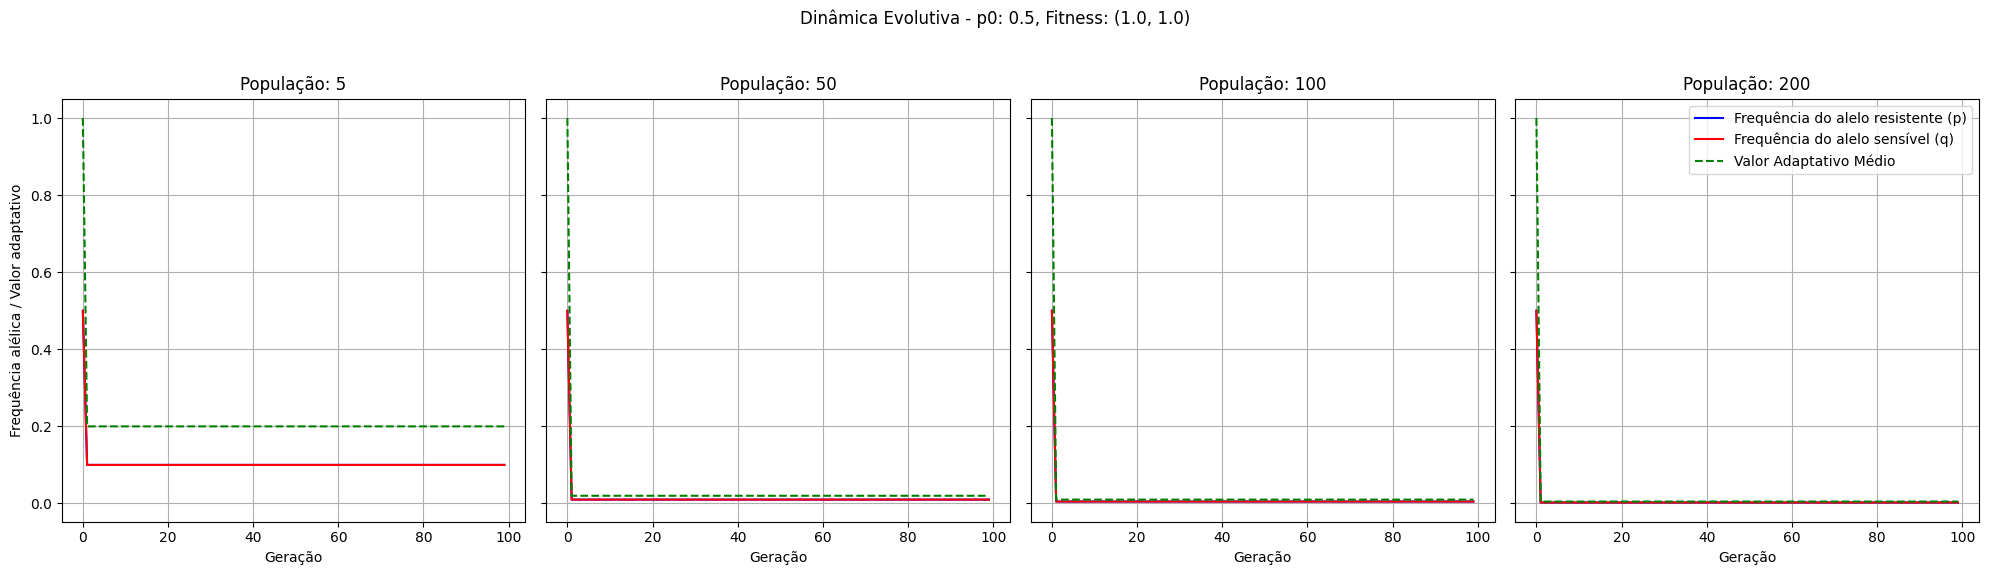

Estagnação detectada na geração 99 para pop_size=5, p0=0.5
Estagnação detectada na geração 99 para pop_size=50, p0=0.5
Estagnação detectada na geração 99 para pop_size=100, p0=0.5
Estagnação detectada na geração 99 para pop_size=200, p0=0.5


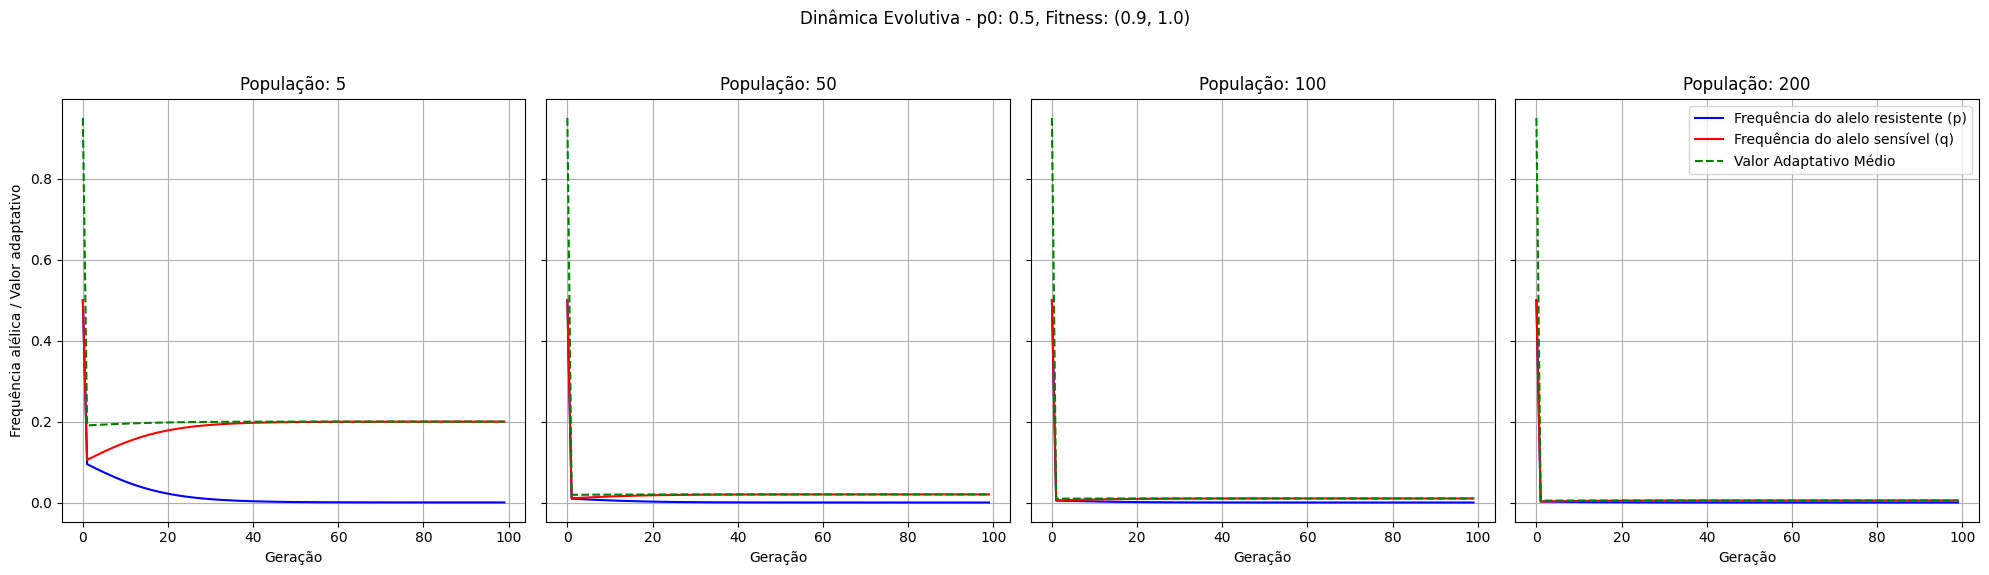

Estagnação detectada na geração 99 para pop_size=5, p0=0.8
Estagnação detectada na geração 99 para pop_size=50, p0=0.8
Estagnação detectada na geração 99 para pop_size=100, p0=0.8
Estagnação detectada na geração 99 para pop_size=200, p0=0.8


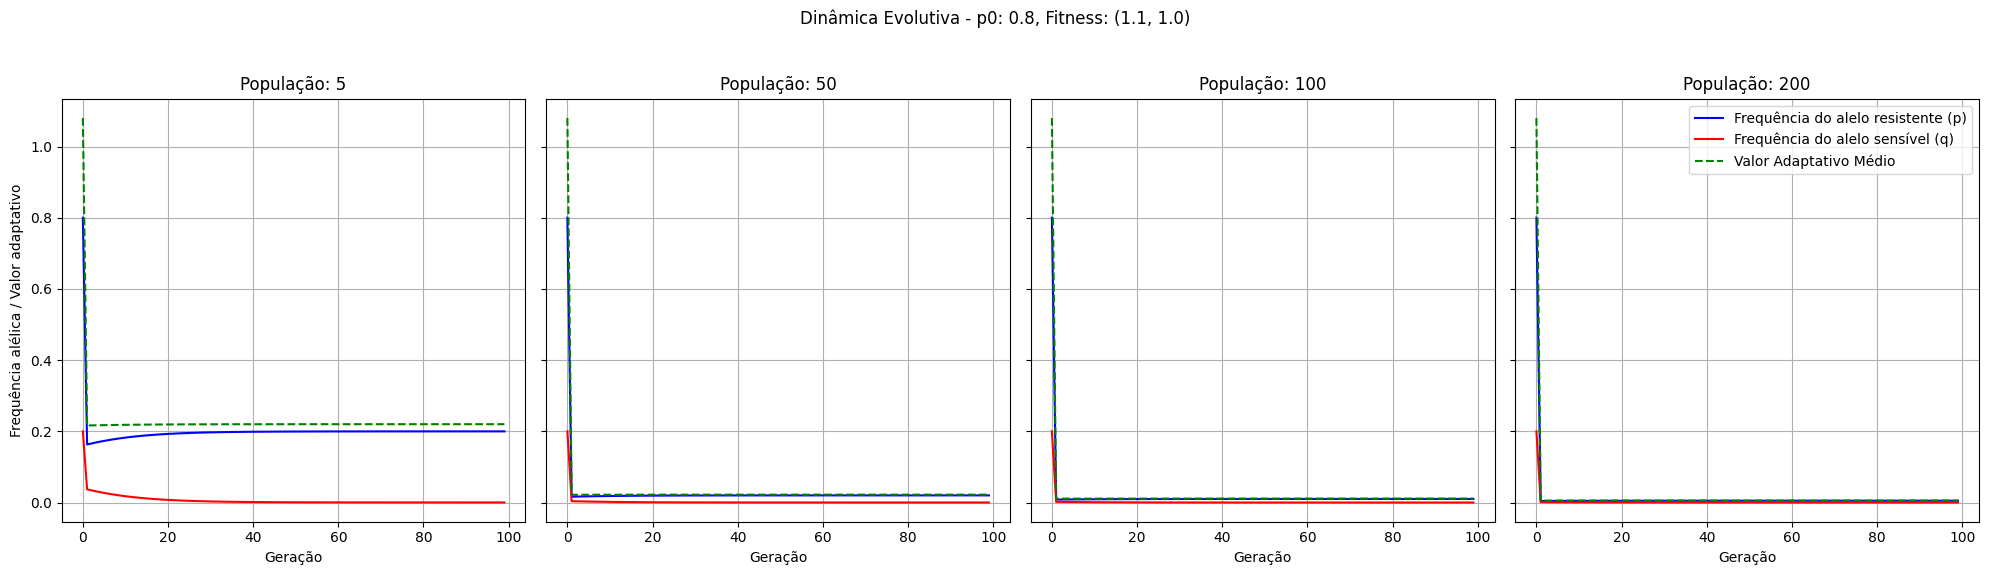

Estagnação detectada na geração 99 para pop_size=5, p0=0.8
Estagnação detectada na geração 99 para pop_size=50, p0=0.8
Estagnação detectada na geração 99 para pop_size=100, p0=0.8
Estagnação detectada na geração 99 para pop_size=200, p0=0.8


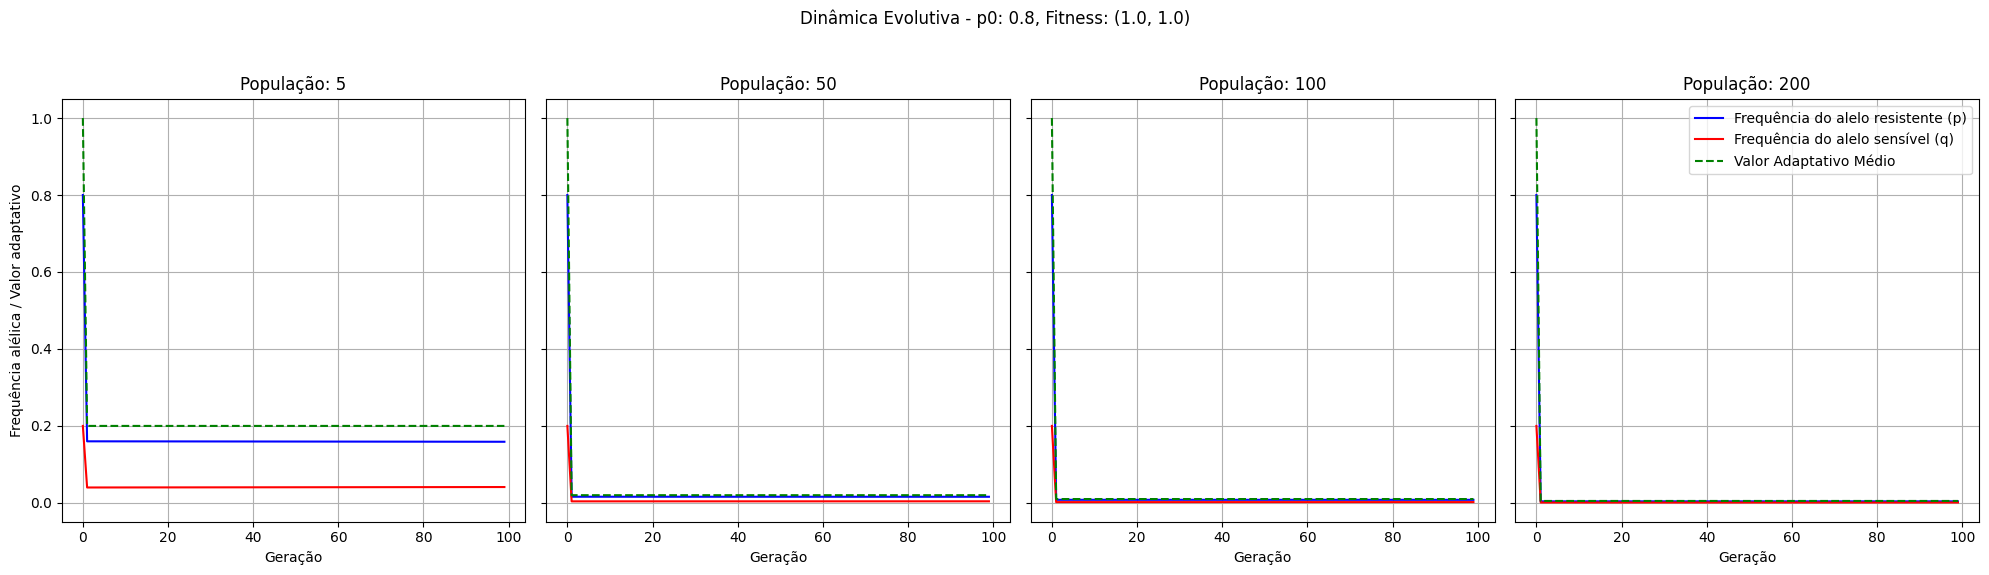

Estagnação detectada na geração 99 para pop_size=5, p0=0.8
Estagnação detectada na geração 99 para pop_size=50, p0=0.8
Estagnação detectada na geração 99 para pop_size=100, p0=0.8
Estagnação detectada na geração 99 para pop_size=200, p0=0.8


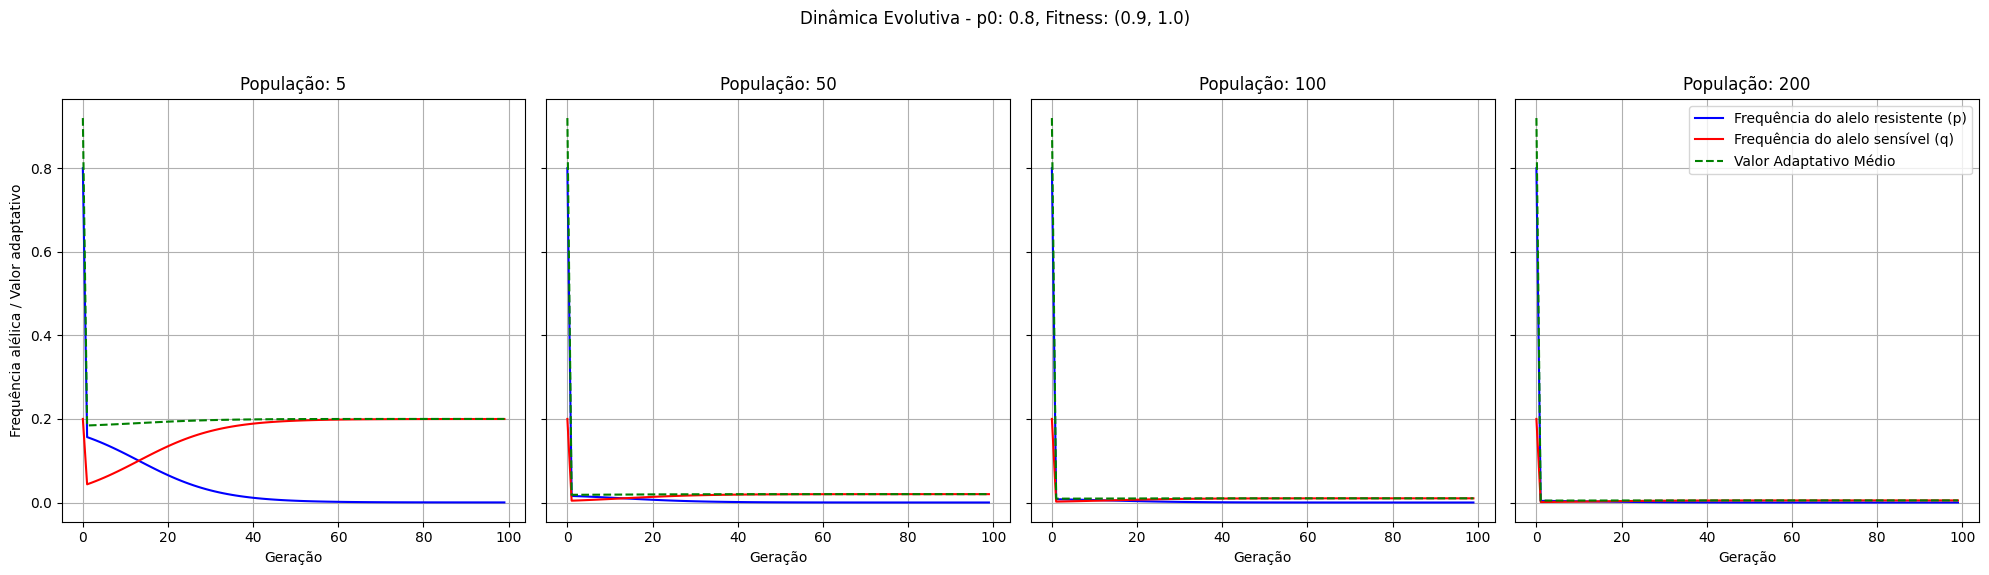

In [24]:
for p0, q0 in zip(p0_list, q0_list):
    for fitness_resistant, fitness_sensitive in fitness_scenarios:
        fig, axes = plt.subplots(1, len(pop_size_list), figsize=(20, 6), sharey=True)
        fig.suptitle(f'Dinâmica Evolutiva - p0: {p0}, Fitness: ({fitness_resistant}, {fitness_sensitive})')
        
        for idx, pop_size in enumerate(pop_size_list):
            p_values, q_values, avg_fitness_values = run_simulation(p0, q0, pop_size, n_generations, u, v, fitness_resistant, fitness_sensitive)
            
            # Verificando Equilíbrio de Hardy-Weinberg
            p_2 = p_values[-1]**2
            q_2 = q_values[-1]**2
            pq_2 = 2 * p_values[-1] * q_values[-1]
            if np.isclose(p_2 + pq_2 + q_2, 1.0, atol=1e-3):
                print(f'Equilíbrio de Hardy-Weinberg atingido para pop_size={pop_size}, p0={p0}')
            
            # Plots
            ax = axes[idx]
            ax.plot(range(len(p_values)), p_values, label='Frequência do alelo resistente (p)', color='b')
            ax.plot(range(len(q_values)), q_values, label='Frequência do alelo sensível (q)', color='r')
            ax.plot(range(len(avg_fitness_values)), avg_fitness_values, label='Valor Adaptativo Médio', color='g', linestyle='--')
            ax.set_xlabel('Geração')
            ax.set_title(f'População: {pop_size}')
            ax.grid()
        
        axes[0].set_ylabel('Frequência alélica / Valor adaptativo')
        axes[-1].legend()
        plt.tight_layout(rect=[0, 0.03, 1, 0.95])
        plt.show()
